# Project: k-Nearest Neighbors and SVM


Vanessa Kromm

## Notebook Structure
1. Importing Libraries and Loading the Data
2. Data Preprocessing
    1. Numerical Variables
    2. Categorical Variables
3. Dimensionality Reduction
4. k-Nearest Neighbors
5. Support Vector Machines
6. Appendix - Things that did not improve the score

## 1. Importing Libraries and Loading the Data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score

from sklearn.svm import SVC 

In [2]:
# Training dataset
df=pd.read_csv('C:/Users/vanes/Desktop/BSE/Term 2/Computational Learning and Deep Learning/HW1/mimic_train.csv')
df.head()

HOSPITAL_EXPIRE_FLAG  subject_id  hadm_id  icustay_id  HeartRate_Min  \
0                     0       55440   195768      228357           89.0   
1                     0       76908   126136      221004           63.0   
2                     0       95798   136645      296315           81.0   
3                     0       40708   102505      245557           76.0   
4                     0       28424   127337      225281            NaN   

   HeartRate_Max  HeartRate_Mean  SysBP_Min  SysBP_Max  SysBP_Mean  ...  \
0          145.0      121.043478       74.0      127.0  106.586957  ...   
1          110.0       79.117647       89.0      121.0  106.733333  ...   
2           98.0       91.689655       88.0      138.0  112.785714  ...   
3          128.0       98.857143       84.0      135.0  106.972973  ...   
4            NaN             NaN        NaN        NaN         NaN  ...   

          Diff  ADMISSION_TYPE  INSURANCE           RELIGION  MARITAL_STATUS  \
0 -61961.78470       EMERGENCY   Medicare  PROTESTANT QUAKER          SINGLE   
1 -43146.18378       EMERGENCY    Private       UNOBTAINABLE         MARRIED   
2 -42009.96157       EMERGENCY   Medicare  PROTESTANT QUAKER       SEPARATED   
3 -43585.37922        ELECTIVE   Medicare      NOT SPECIFIED         WIDOWED   
4 -50271.76602       EMERGENCY   Medicare             JEWISH         WIDOWED   

                ETHNICITY                  DIAGNOSIS  ICD9_diagnosis  \
0                   WHITE     GASTROINTESTINAL BLEED            5789   
1                   WHITE  ESOPHAGEAL FOOD IMPACTION           53013   
2  BLACK/AFRICAN AMERICAN             UPPER GI BLEED           56983   
3                   WHITE          HIATAL HERNIA/SDA            5533   
4                   WHITE             ABDOMINAL PAIN           56211   

   FIRST_CAREUNIT     LOS  
0            MICU  4.5761  
1            MICU  0.7582  
2            MICU  3.7626  
3            SICU  3.8734  
4           TSICU  5.8654  

[5 rows x 44 columns]

In [3]:
# Test dataset (to produce predictions)
df_test=pd.read_csv('C:/Users/vanes/Desktop/BSE/Term 2/Computational Learning and Deep Learning/HW1/mimic_test_death.csv')
df_test.sort_values('icustay_id').head()

subject_id  hadm_id  icustay_id  HeartRate_Min  HeartRate_Max  \
4930       93535   121562      200011           56.0           82.0   
1052       30375   177945      200044            NaN            NaN   
3412       73241   149216      200049           54.0           76.0   
1725       99052   129142      200063           85.0          102.0   
981        51698   190004      200081           82.0          133.0   

      HeartRate_Mean  SysBP_Min  SysBP_Max  SysBP_Mean  DiasBP_Min  ...  \
4930       71.205128      123.0      185.0  156.411765        37.0  ...   
1052             NaN        NaN        NaN         NaN         NaN  ...   
3412       64.833333       95.0      167.0  114.545455        33.0  ...   
1725       92.560976       91.0      131.0  108.365854        42.0  ...   
981        94.323529       86.0      143.0  111.093750        47.0  ...   

                ADMITTIME         Diff  ADMISSION_TYPE  INSURANCE  \
4930  2188-08-05 20:27:00 -64881.43517       EMERGENCY   Medicare   
1052  2135-07-07 16:13:00 -46540.62661       EMERGENCY   Medicare   
3412  2118-08-14 22:27:00 -38956.85890       EMERGENCY    Private   
1725  2141-03-09 23:19:00 -47014.25437       EMERGENCY   Medicaid   
981   2142-02-23 06:56:00 -47377.26087       EMERGENCY   Medicare   

           RELIGION  MARITAL_STATUS              ETHNICITY  \
4930         JEWISH          SINGLE                  WHITE   
1052       CATHOLIC         WIDOWED                  WHITE   
3412         JEWISH         MARRIED                  WHITE   
1725  NOT SPECIFIED          SINGLE  UNKNOWN/NOT SPECIFIED   
981           OTHER         MARRIED             PORTUGUESE   

                     DIAGNOSIS  ICD9_diagnosis  FIRST_CAREUNIT  
4930  ASTHMA;COPD EXACERBATION           49322            MICU  
1052                HEAD BLEED           85220            SICU  
3412    HEPATIC ENCEPHALOPATHY            5722            MICU  
1725         TYPE A DISSECTION           44101            CSRU  
981         PULMONARY EMBOLISM           41519             CCU  

[5 rows x 39 columns]

In [4]:
# explore data
df.shape

(20885, 44)

In [5]:
df_test.shape

(5221, 39)

less columns in df_test means we cannot use them to make predictions -> drop these in train data

In [6]:
df.dtypes

HOSPITAL_EXPIRE_FLAG      int64
subject_id                int64
hadm_id                   int64
icustay_id                int64
HeartRate_Min           float64
HeartRate_Max           float64
HeartRate_Mean          float64
SysBP_Min               float64
SysBP_Max               float64
SysBP_Mean              float64
DiasBP_Min              float64
DiasBP_Max              float64
DiasBP_Mean             float64
MeanBP_Min              float64
MeanBP_Max              float64
MeanBP_Mean             float64
RespRate_Min            float64
RespRate_Max            float64
RespRate_Mean           float64
TempC_Min               float64
TempC_Max               float64
TempC_Mean              float64
SpO2_Min                float64
SpO2_Max                float64
SpO2_Mean               float64
Glucose_Min             float64
Glucose_Max             float64
Glucose_Mean            float64
GENDER                   object
DOB                      object
DOD                      object
ADMITTIM

In [7]:
df_test.dtypes

subject_id          int64
hadm_id             int64
icustay_id          int64
HeartRate_Min     float64
HeartRate_Max     float64
HeartRate_Mean    float64
SysBP_Min         float64
SysBP_Max         float64
SysBP_Mean        float64
DiasBP_Min        float64
DiasBP_Max        float64
DiasBP_Mean       float64
MeanBP_Min        float64
MeanBP_Max        float64
MeanBP_Mean       float64
RespRate_Min      float64
RespRate_Max      float64
RespRate_Mean     float64
TempC_Min         float64
TempC_Max         float64
TempC_Mean        float64
SpO2_Min          float64
SpO2_Max          float64
SpO2_Mean         float64
Glucose_Min       float64
Glucose_Max       float64
Glucose_Mean      float64
GENDER             object
DOB                object
ADMITTIME          object
Diff              float64
ADMISSION_TYPE     object
INSURANCE          object
RELIGION           object
MARITAL_STATUS     object
ETHNICITY          object
DIAGNOSIS          object
ICD9_diagnosis     object
FIRST_CAREUN

## 2. Data Preprocessing

We see that the training data has more columns then the test data. To do a prediction, train and test data must have the same columns.

In [8]:
# Check which columns are in train that are not in test
unique_columns_df = set(df.columns) - set(df_test.columns)
print(unique_columns_df)

{'HOSPITAL_EXPIRE_FLAG', 'DOD', 'LOS', 'DISCHTIME', 'DEATHTIME'}


In [9]:
# Drop columns that are not in test data (except for the target column HOSPITAL_EXPIRE_FLAG)
df = df.drop(['DISCHTIME','DEATHTIME', 'LOS', 'DOD'], axis=1)

In [10]:
# Look at key facts about numerical variables
df.describe()

HOSPITAL_EXPIRE_FLAG    subject_id        hadm_id     icustay_id  \
count          20885.000000  20885.000000   20885.000000   20885.000000   
mean               0.112282  58950.496098  150082.402298  250202.495523   
std                0.315720  25299.439535   28898.479845   28909.806302   
min                0.000000     23.000000  100001.000000  200001.000000   
25%                0.000000  41132.000000  125157.000000  225153.000000   
50%                0.000000  60441.000000  150152.000000  250452.000000   
75%                0.000000  80286.000000  175017.000000  275303.000000   
max                1.000000  99999.000000  199999.000000  299998.000000   

       HeartRate_Min  HeartRate_Max  HeartRate_Mean     SysBP_Min  \
count   18698.000000   18698.000000    18698.000000  18677.000000   
mean       69.705904     105.239801       85.180250     91.110564   
std        14.869840      20.922613       15.318208     17.532534   
min         2.000000      39.000000       34.714286      5.000000   
25%        60.000000      90.000000       74.272727     81.000000   
50%        69.000000     103.000000       84.131183     90.000000   
75%        79.000000     118.000000       95.185588    101.000000   
max       141.000000     280.000000      163.875000    181.000000   

          SysBP_Max    SysBP_Mean  ...     TempC_Min     TempC_Max  \
count  18677.000000  18677.000000  ...  18388.000000  18388.000000   
mean     150.725920    119.145423  ...     36.051208     37.428781   
std       23.833793     16.701503  ...      0.732124      0.799897   
min       46.000000     46.000000  ...     15.000000     30.800000   
25%      134.000000    107.100000  ...     35.666667     36.944444   
50%      148.000000    116.901961  ...     36.111111     37.333333   
75%      164.000000    129.465116  ...     36.500000     37.888889   
max      323.000000    202.172414  ...     40.100000     42.000000   

         TempC_Mean      SpO2_Min      SpO2_Max     SpO2_Mean   Glucose_Min  \
count  18388.000000  18682.000000  18682.000000  18682.000000  20632.000000   
mean      36.751717     91.007494     99.555883     96.866685    106.781975   
std        0.603476      7.399390      1.159792      2.333108     35.178811   
min       30.666667      1.000000     57.000000     47.666667      2.000000   
25%       36.388889     90.000000    100.000000     95.812500     86.000000   
50%       36.731481     92.000000    100.000000     97.142857    102.000000   
75%       37.092593     94.000000    100.000000     98.346154    121.000000   
max       40.238333    100.000000    100.000000    100.000000    563.000000   

        Glucose_Max  Glucose_Mean          Diff  
count  20632.000000  20632.000000  20885.000000  
mean     182.129604    138.856428 -51617.069830  
std       92.665603     44.933145  10686.395846  
min       42.000000     42.000000 -72740.274440  
25%      126.000000    110.750000 -60864.454110  
50%      161.000000    128.666667 -51561.703460  
75%      206.000000    154.578571 -42327.560030  
max     2440.000000    771.900000 -32157.494580  

[8 rows x 29 columns]

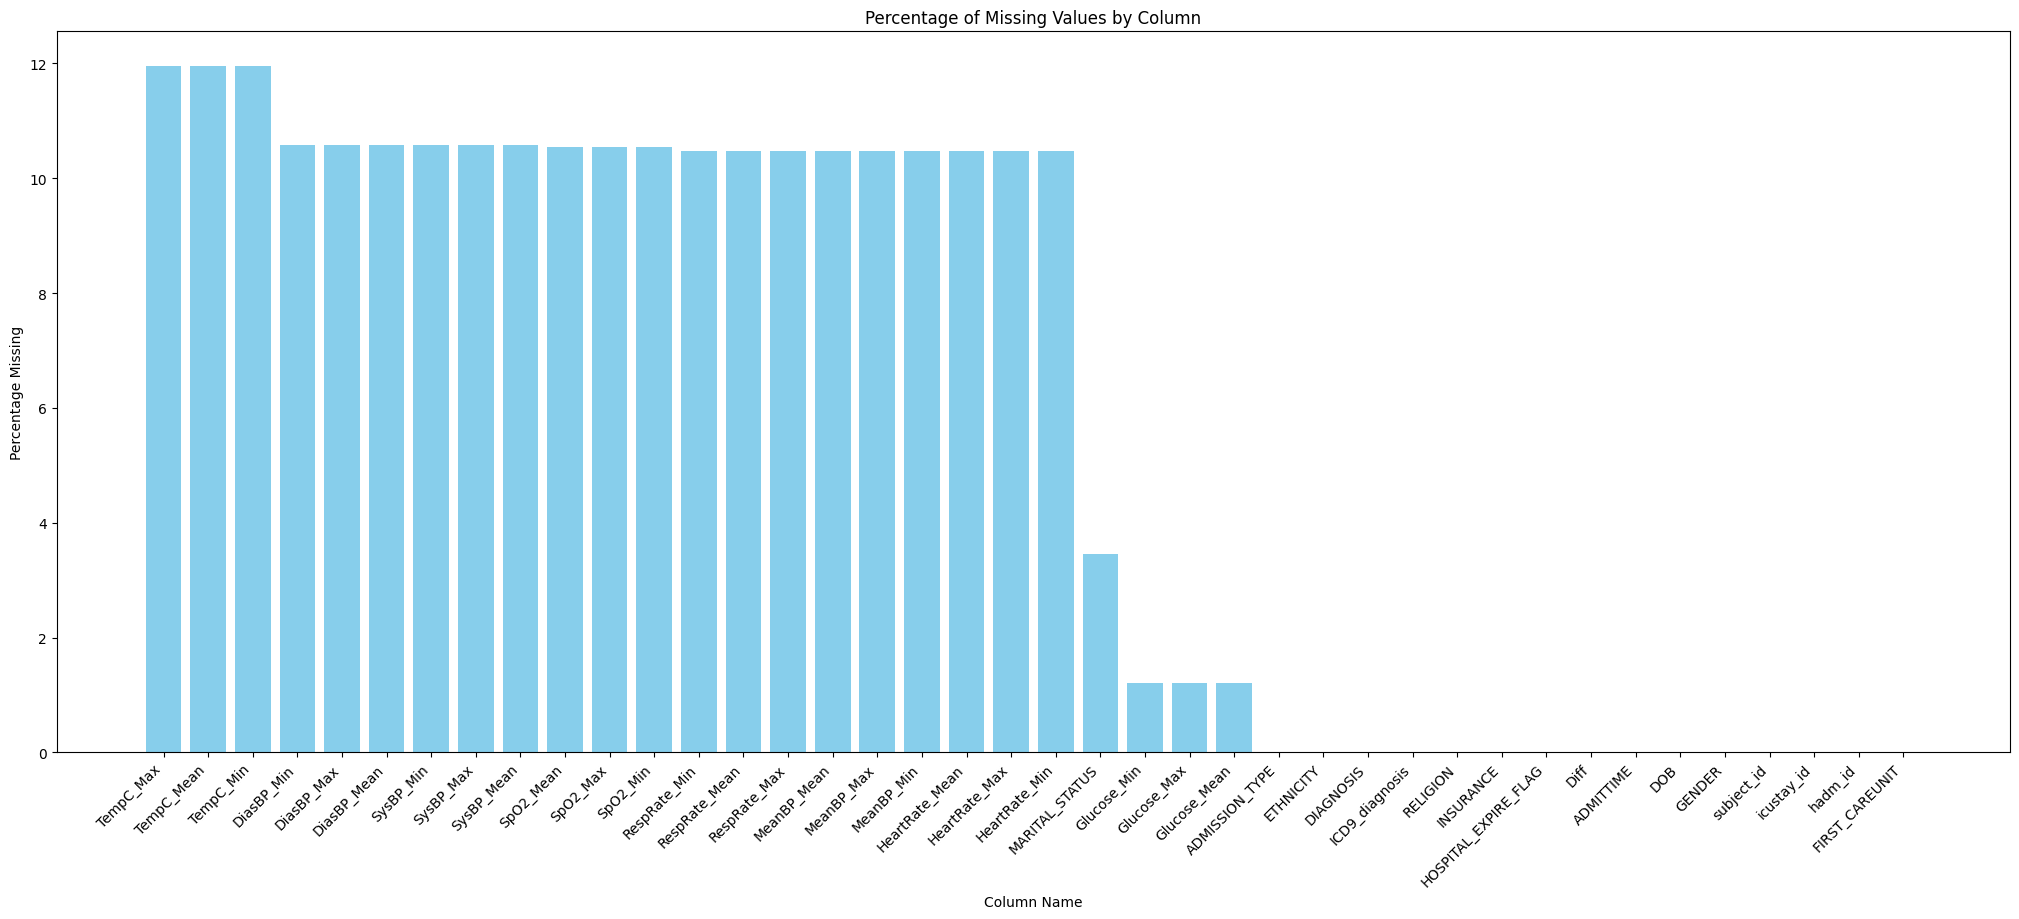


Columns with Missing Values (Descending Order):
TempC_Max: 11.96% (Numerical)
TempC_Mean: 11.96% (Numerical)
TempC_Min: 11.96% (Numerical)
DiasBP_Min: 10.58% (Numerical)
DiasBP_Max: 10.58% (Numerical)
DiasBP_Mean: 10.58% (Numerical)
SysBP_Min: 10.57% (Numerical)
SysBP_Max: 10.57% (Numerical)
SysBP_Mean: 10.57% (Numerical)
SpO2_Mean: 10.55% (Numerical)
SpO2_Max: 10.55% (Numerical)
SpO2_Min: 10.55% (Numerical)
RespRate_Min: 10.48% (Numerical)
RespRate_Mean: 10.48% (Numerical)
RespRate_Max: 10.48% (Numerical)
MeanBP_Mean: 10.47% (Numerical)
MeanBP_Max: 10.47% (Numerical)
MeanBP_Min: 10.47% (Numerical)
HeartRate_Mean: 10.47% (Numerical)
HeartRate_Max: 10.47% (Numerical)
HeartRate_Min: 10.47% (Numerical)
MARITAL_STATUS: 3.46% (Categorical)
Glucose_Min: 1.21% (Numerical)
Glucose_Max: 1.21% (Numerical)
Glucose_Mean: 1.21% (Numerical)


In [11]:
# Look at missing values in train
def calculate_missing_info_print_only(df):
    # Calculate the percentage of missing values in each column
    missing_percentages_df = (df.isnull().mean() * 100).round(2).reset_index()
    missing_percentages_df.columns = ['Column Name', 'Percentage Missing']

    # Sort the DataFrame by 'Percentage Missing' in descending order
    missing_percentages_df = missing_percentages_df.sort_values(by='Percentage Missing', ascending=False)

    # Classify columns as numerical or categorical
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    missing_percentages_df['Column Type'] = missing_percentages_df['Column Name'].apply(
        lambda x: 'Numerical' if x in numerical_columns else 'Categorical'
    )

    # Display a bar chart of missing values with increased space between bars
    plt.figure(figsize=(20, 9))
    plt.bar(missing_percentages_df['Column Name'], missing_percentages_df['Percentage Missing'], color='skyblue')
    plt.xlabel('Column Name')
    plt.ylabel('Percentage Missing')
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout(pad=0.0001)  # Adjust the padding between bars
    plt.show()

    # Print column names, missing percentages, and column types for columns with missing values higher than 0%
    print("\nColumns with Missing Values (Descending Order):")
    for index, row in missing_percentages_df.iterrows():
        if row['Percentage Missing'] > 0:
            print(f"{row['Column Name']}: {row['Percentage Missing']}% ({row['Column Type']})")

# Example usage with the existing DataFrame 'df'
calculate_missing_info_print_only(df)

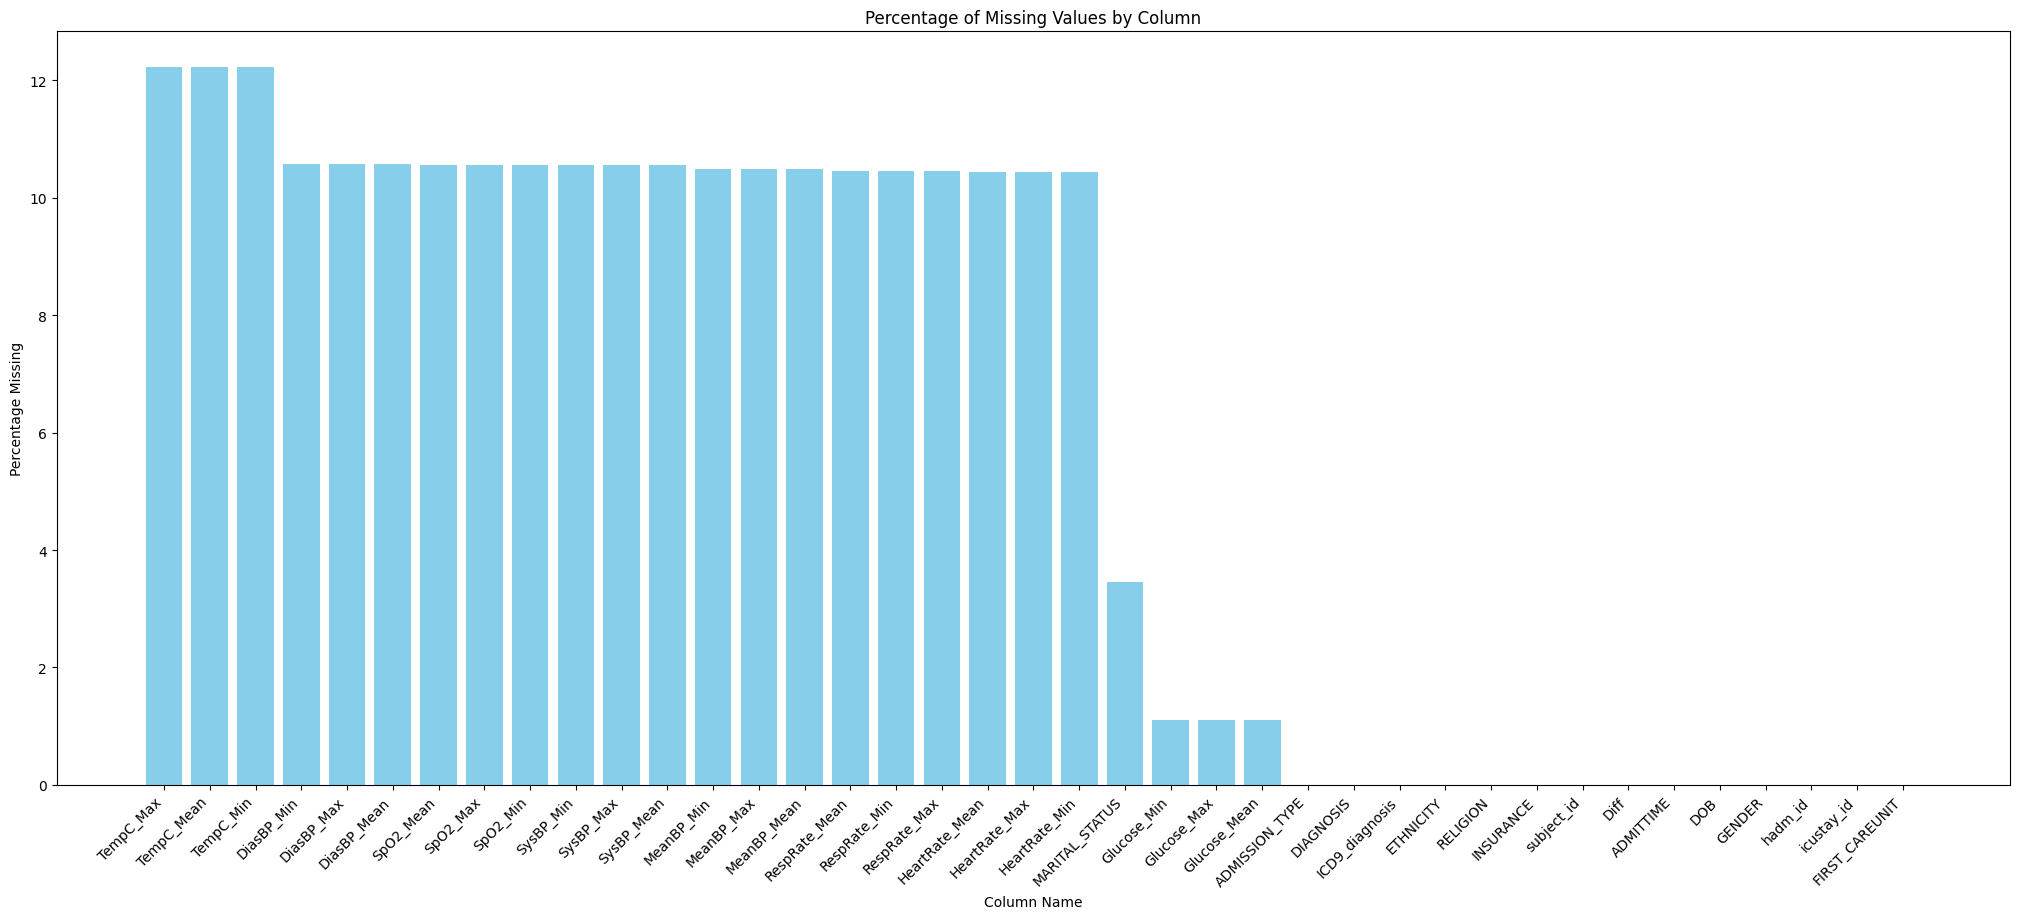


Columns with Missing Values (Descending Order):
TempC_Max: 12.22% (Numerical)
TempC_Mean: 12.22% (Numerical)
TempC_Min: 12.22% (Numerical)
DiasBP_Min: 10.57% (Numerical)
DiasBP_Max: 10.57% (Numerical)
DiasBP_Mean: 10.57% (Numerical)
SpO2_Mean: 10.55% (Numerical)
SpO2_Max: 10.55% (Numerical)
SpO2_Min: 10.55% (Numerical)
SysBP_Min: 10.55% (Numerical)
SysBP_Max: 10.55% (Numerical)
SysBP_Mean: 10.55% (Numerical)
MeanBP_Min: 10.48% (Numerical)
MeanBP_Max: 10.48% (Numerical)
MeanBP_Mean: 10.48% (Numerical)
RespRate_Mean: 10.46% (Numerical)
RespRate_Min: 10.46% (Numerical)
RespRate_Max: 10.46% (Numerical)
HeartRate_Mean: 10.44% (Numerical)
HeartRate_Max: 10.44% (Numerical)
HeartRate_Min: 10.44% (Numerical)
MARITAL_STATUS: 3.45% (Categorical)
Glucose_Min: 1.11% (Numerical)
Glucose_Max: 1.11% (Numerical)
Glucose_Mean: 1.11% (Numerical)


In [12]:
# Look at missing values in test
calculate_missing_info_print_only(df_test)

We only see small percentages of missing data (maximum 12.22%), no column will be removed because of this. The imputation of missing values will happen later.

### 2.1 Numerical Variables

#### Look at distribution of numerical columns

In [13]:
# Define numerical columns
numerical_columns = df.select_dtypes(include='number').columns

In [14]:
numerical_columns

Index(['HOSPITAL_EXPIRE_FLAG', 'subject_id', 'hadm_id', 'icustay_id',
       'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'Diff'],
      dtype='object')

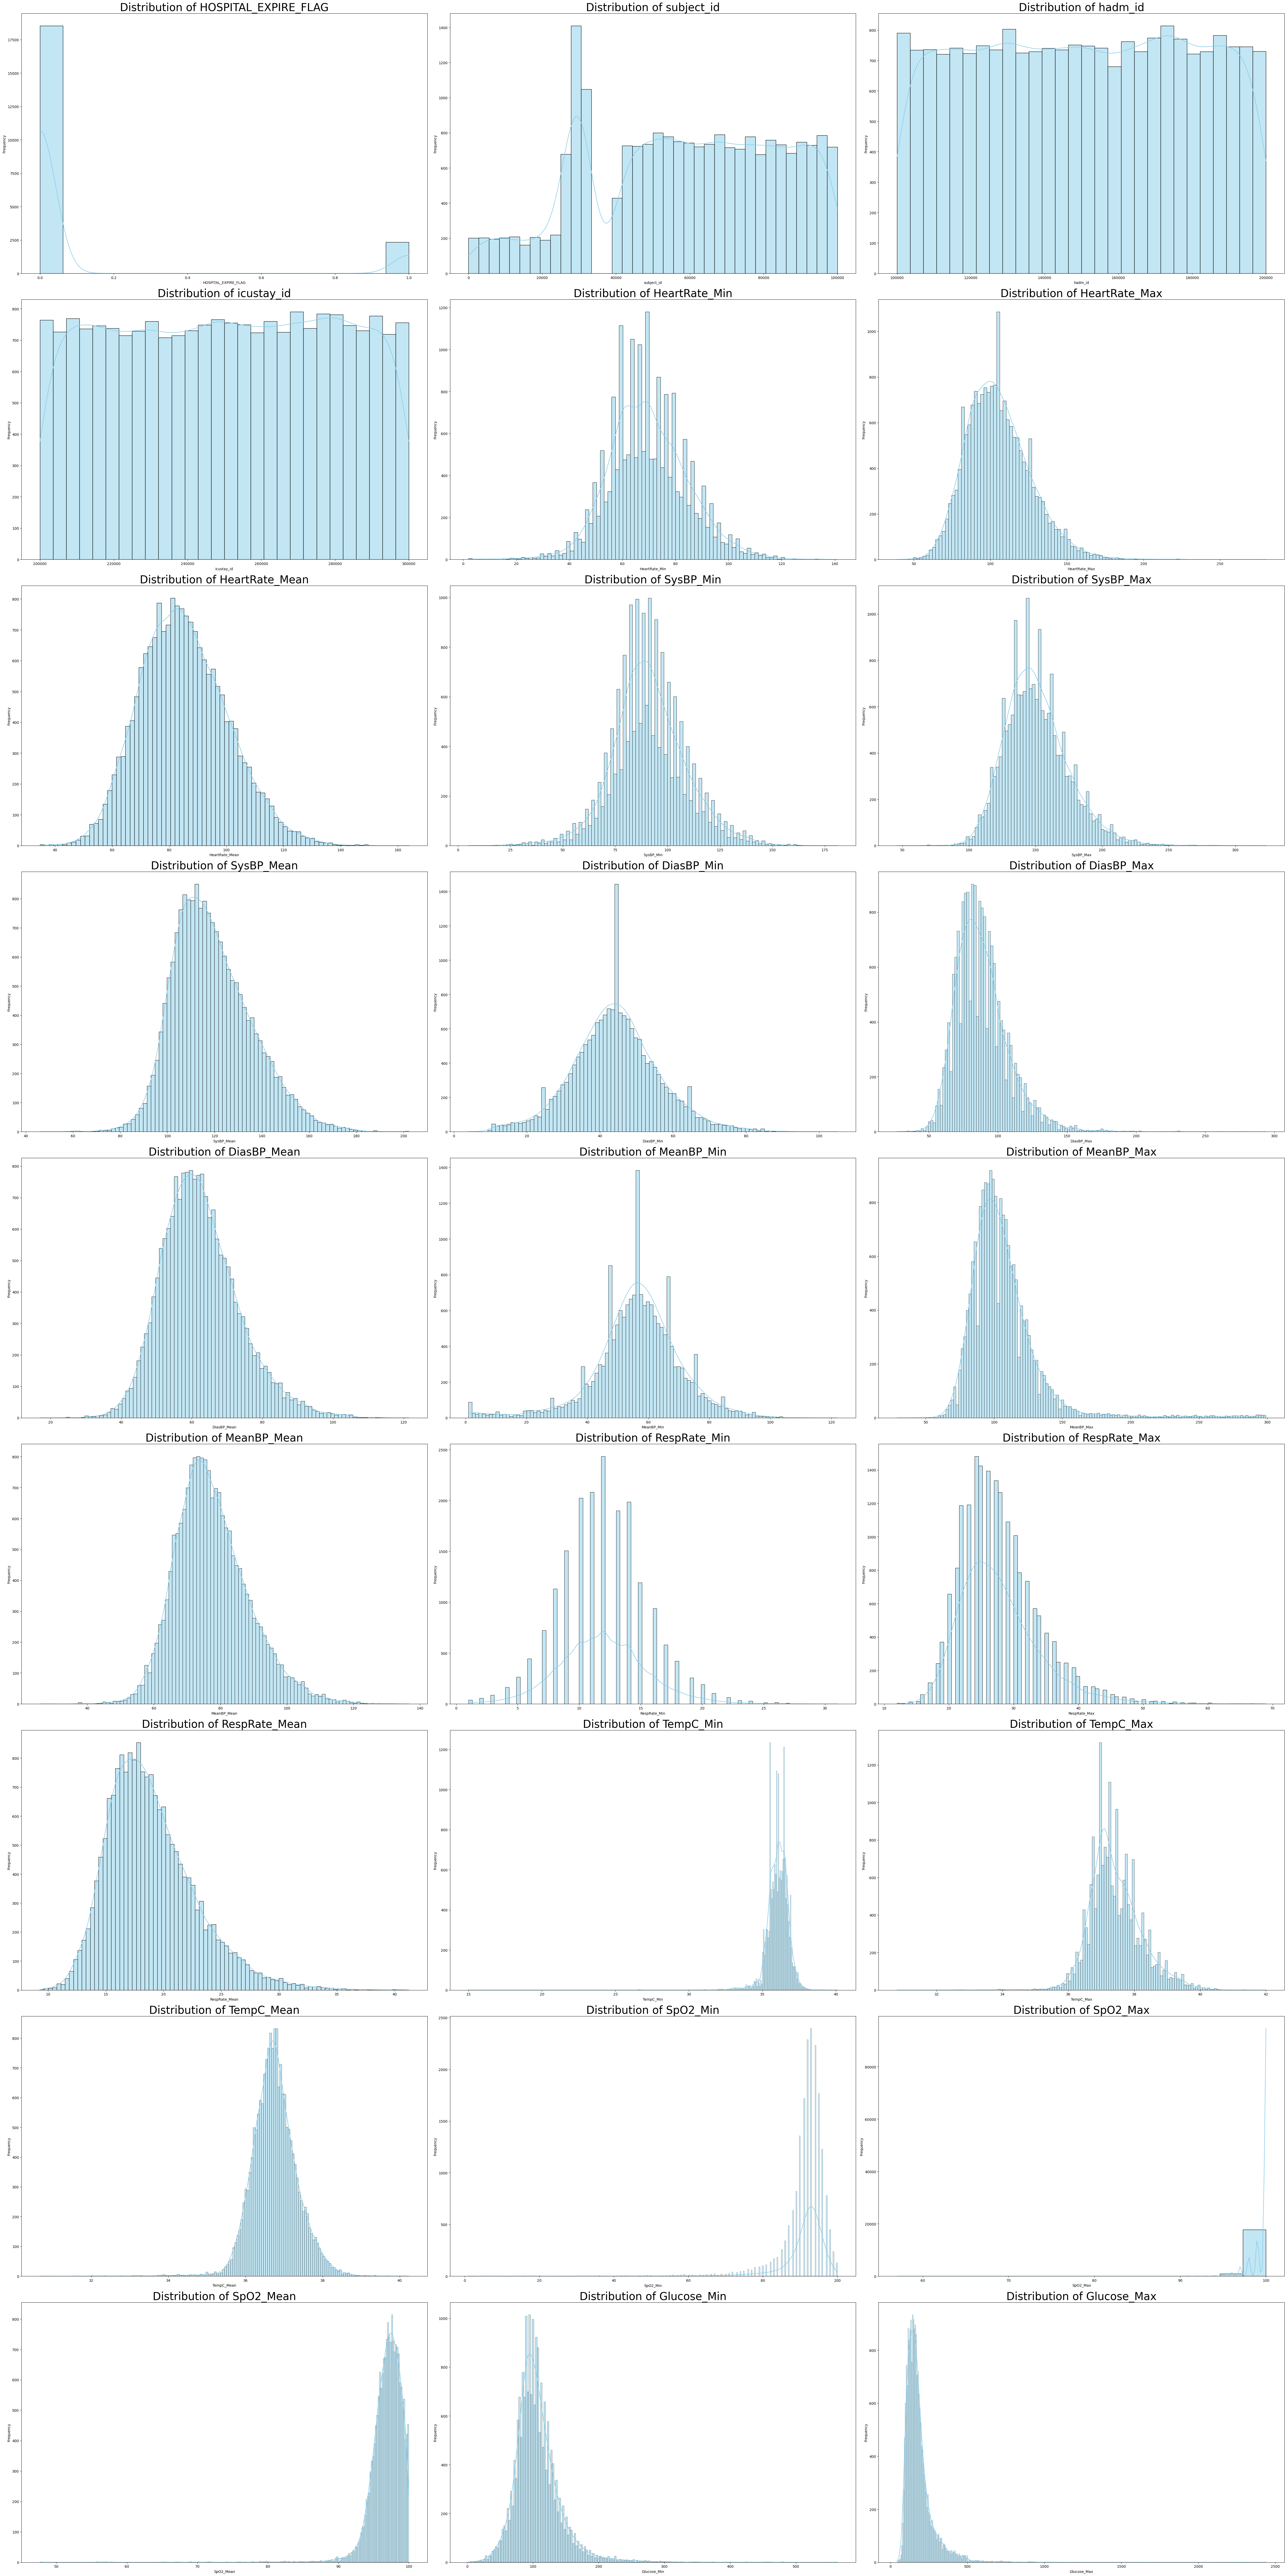

In [15]:
# Setting up the subplots
fig, axes = plt.subplots(9, 3, figsize=(50, 100))

# Creating histograms for each variable
for ax, var in zip(axes.flatten(), numerical_columns):
    sns.histplot(df[var], ax=ax, color="skyblue", edgecolor='black', kde=True)
    ax.set_title(f'Distribution of {var}', fontsize = 30)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()
plt.show()

Based on the plots, numerical data looks well distributed. Though, it looks like there are some outliers. They will be threaten later.

#### Look at Date of Birth (DOB)

First, we have to add the values of the column "Diff" to both, DOB and ADMITTIME to get the actual dates

In [16]:
# Convert the entries in DOB and ADMITTIME to datetime format in train
df['DOB'] = pd.to_datetime(df['DOB'])
df['ADMITTIME'] = pd.to_datetime(df['ADMITTIME'])

# Add values from Diff to obtain the correct date
df['DOB'] += pd.to_timedelta(df['Diff'], unit='D')
df['ADMITTIME'] += pd.to_timedelta(df['Diff'], unit='D')

# Convert the entries in DOB and ADMITTIME to datetime format in test
df_test['DOB'] = pd.to_datetime(df_test['DOB'])
df_test['ADMITTIME'] = pd.to_datetime(df_test['ADMITTIME'])

# Add values from Diff to obtain the correct date
df_test['DOB'] += pd.to_timedelta(df_test['Diff'], unit='D')
df_test['ADMITTIME'] += pd.to_timedelta(df_test['Diff'], unit='D')


In [17]:
from dateutil.relativedelta import relativedelta
# Calculate the age at admission based on the corrected dates
df['age'] = df.apply(lambda x: relativedelta(x['ADMITTIME'], x['DOB']).years, axis=1)
df_test['age'] = df_test.apply(lambda x: relativedelta(x['ADMITTIME'], x['DOB']).years, axis=1)

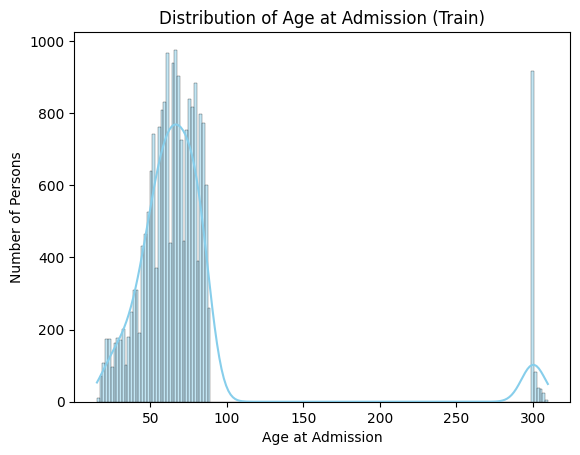

In [18]:
# Plot age at admission for train
fig, ax = plt.subplots()
sns.histplot(df['age'], ax=ax, color="skyblue", edgecolor='black', kde=True)
plt.xlabel('Age at Admission')
plt.ylabel('Number of Persons')
plt.title('Distribution of Age at Admission (Train)')
plt.show()

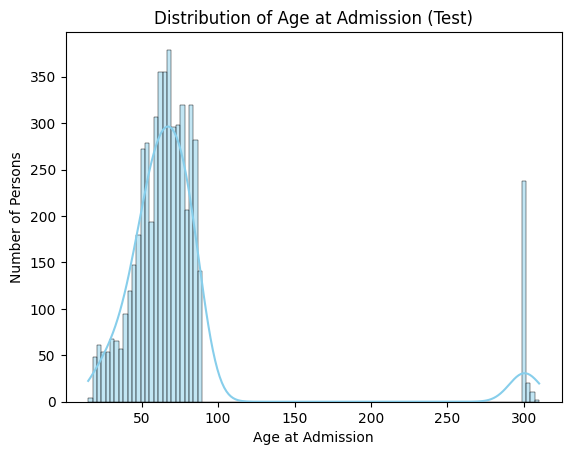

In [19]:
# Plot age at submission for test
fig, ax = plt.subplots()
sns.histplot(df_test['age'], ax=ax, color="skyblue", edgecolor='black', kde=True)
plt.xlabel('Age at Admission')
plt.ylabel('Number of Persons')
plt.title('Distribution of Age at Admission (Test)')
plt.show()

For both dataframes we see, that the distribution of ages less than 100 years looks logical. However, we have some clear outliers, which are persons that are 300 years old and older.

I will first take a look whether there are values of the outliers that are very different from the values of the non-outliers to see, whether there is a reason or a "pattern" for the very high ages.

In [20]:
# Define columns to compare
columns_to_compare = ['HOSPITAL_EXPIRE_FLAG', 'icustay_id', 'HeartRate_Min', 'HeartRate_Max',
       'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min',
       'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
       'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min',
       'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean',
       'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'Diff', 'DOB', 'ADMITTIME']

# Lists to store comparison results
columns = []
means_not_outliers_list = []
min_not_outliers_list = []
max_not_outliers_list = []
means_outliers_list = []
min_outliers_list = []
max_outliers_list = []

# Iterate over columns
for column in columns_to_compare:
    means_not_outliers = df[df['age'] < 100][column].mean()
    min_not_outliers = df[df['age'] < 100][column].min()
    max_not_outliers = df[df['age'] < 100][column].max()
    means_outliers = df[df['age'] > 100][column].mean()
    min_outliers = df[df['age'] > 100][column].min()
    max_outliers = df[df['age'] > 100][column].max()
    columns.append(column)
    means_not_outliers_list.append(means_not_outliers)
    min_not_outliers_list.append(min_not_outliers)
    max_not_outliers_list.append(max_not_outliers)
    means_outliers_list.append(means_outliers)
    min_outliers_list.append(min_outliers)
    max_outliers_list.append(max_outliers)

# Create comparison DataFrame
unique_values_comparison = pd.DataFrame({
    'Column': columns,
    'means_not_outliers': means_not_outliers_list,
    'means_outliers': means_outliers_list,
    'min_not_outliers': min_not_outliers_list,
    'min_outliers': min_outliers_list,
    'max_not_outliers': max_not_outliers_list,
    'max_outliers': max_outliers_list
})

# Display the comparison DataFrame
unique_values_comparison

Column             means_not_outliers  \
0   HOSPITAL_EXPIRE_FLAG                       0.108909   
1             icustay_id                  250090.997118   
2          HeartRate_Min                      69.953408   
3          HeartRate_Max                     105.506286   
4         HeartRate_Mean                      85.451702   
5              SysBP_Min                      91.257081   
6              SysBP_Max                     150.600384   
7             SysBP_Mean                     119.151423   
8             DiasBP_Min                      44.705756   
9             DiasBP_Max                      88.368088   
10           DiasBP_Mean                      62.857032   
11            MeanBP_Min                      56.598238   
12            MeanBP_Max                     107.130683   
13           MeanBP_Mean                      77.888598   
14          RespRate_Min                      11.858995   
15          RespRate_Max                      27.741711   
16         RespRate_Mean                      18.931954   
17             TempC_Min                      36.065439   
18             TempC_Max                       37.44608   
19            TempC_Mean                      36.767694   
20              SpO2_Min                      91.086254   
21              SpO2_Max                      99.556692   
22             SpO2_Mean                      96.884129   
23           Glucose_Min                     106.588449   
24           Glucose_Max                     182.523062   
25          Glucose_Mean                      138.94616   
26                  Diff                  -51589.021359   
27                   DOB  1947-07-14 20:05:48.991230080   
28             ADMITTIME  2010-04-13 02:39:21.566819072   

                   means_outliers               min_not_outliers  \
0                        0.172538                              0   
1                   252194.560072                         200001   
2                       65.283552                            2.0   
3                      100.478305                           39.0   
4                       80.329998                      34.714286   
5                       88.492929                            5.0   
6                      152.968687                           46.0   
7                      119.038223                           46.0   
8                       37.576768                            4.0   
9                       88.230303                           29.0   
10                       56.34085                         24.625   
11                      50.845766                            1.0   
12                      106.06754                           29.0   
13                      72.628311                      25.759907   
14                      12.994955                            1.0   
15                      28.468214                           12.0   
16                      19.948837                       9.291667   
17                      35.800574                           15.0   
18                      37.124128                           30.8   
19                      36.470334                      30.666667   
20                           89.6                            1.0   
21                      99.541414                           57.0   
22                      96.554948                      47.666667   
23                     110.299257                            5.7   
24                     174.978625                           42.0   
25                     137.225578                           42.0   
26                  -52118.192369                   -72740.27444   
27  1709-06-22 18:51:46.190828544  1919-02-09 05:58:34.463999957   
28  2010-03-23 21:49:57.410341376  2007-12-07 21:56:04.607999715   

                     min_outliers               max_not_outliers  \
0                               0                              1   
1                          200217                         299998   
2 

We see that most of the values for both dataframes are quite similar. As a result, I don't assume a systematic error based on one of the other values. The error seems to depend on the year of birth: For the rows that have an age higher than 100, the mean birth year is 1709, for the rows where the age seems valid it is 1947. What is also noticable is that the mean for HOSPITAL_EXPIRE_FLAG is nearly double as high as for the non-outliers.

In [21]:
# Look at MARITAL_STATUS for outliers
df[df['age']>100]['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
WIDOWED              557
MARRIED              307
SINGLE               157
DIVORCED              20
UNKNOWN (DEFAULT)      6
SEPARATED              2
Name: count, dtype: int64

The high proportion of widowed could indicate a high age.

This analysis togetehr with some research on the internet suggests, that the outliers (age around 300 years), were older patience whose birth date was manipulated to keep their identity anonymous. To deal with that, I will set their age to the maximum of the non-outliers.

In [22]:
# Calculate maximum age
max_age = df[df['age']<100]['age'].max()
print(max_age)

89


In [23]:
# Define a function to set the age for outliers to the max_age from the train data
def set_age_threshold(df, threshold=100, new_value=max_age):
    df.loc[df['age'] > threshold, 'age'] = new_value
    return df

In [24]:
# Apply it to both, train and test data
df = set_age_threshold(df)
df_test = set_age_threshold(df_test)

#### Dealing with missing values

As seen before we have some column with missing values:  
TempC_Mean: 11.96% (Numerical)  
TempC_Max: 11.96% (Numerical)  
TempC_Min: 11.96% (Numerical)  
DiasBP_Min: 10.58% (Numerical)  
DiasBP_Max: 10.58% (Numerical)  
DiasBP_Mean: 10.58% (Numerical)  
SysBP_Min: 10.57% (Numerical)  
SysBP_Max: 10.57% (Numerical)  
SysBP_Mean: 10.57% (Numerical)  
SpO2_Mean: 10.55% (Numerical)  
SpO2_Max: 10.55% (Numerical)  
SpO2_Min: 10.55% (Numerical)  
RespRate_Min: 10.48% (Numerical)  
RespRate_Mean: 10.48% (Numerical)  
RespRate_Max: 10.48% (Numerical)  
MeanBP_Mean: 10.47% (Numerical)  
MeanBP_Max: 10.47% (Numerical)  
MeanBP_Min: 10.47% (Numerical)  
HeartRate_Mean: 10.47% (Numerical)  
HeartRate_Max: 10.47% (Numerical)  
HeartRate_Min: 10.47% (Numerical)  
MARITAL_STATUS: 3.46% (Categorical)  
Glucose_Min: 1.21% (Numerical)  
Glucose_Max: 1.21% (Numerical)  
Glucose_Mean: 1.21% (Numerical)  

Many of the values (except for MARITAL_STATUS and Glucose values) are quite the same. I will inspect first whether it is the same observations with the missing values

In [25]:
# Look at observations that have missing values for TempC_Max (highest proportion of missing values)
df[df['TempC_Max'].isna()]

HOSPITAL_EXPIRE_FLAG  subject_id  hadm_id  icustay_id  HeartRate_Min  \
4                         0       28424   127337      225281            NaN   
17                        0       53782   190648      246339           72.0   
19                        0       28939   171688      274823            NaN   
24                        0       32122   121433      298281            NaN   
41                        0       27429   155381      222376            NaN   
...                     ...         ...      ...         ...            ...   
20847                     0       30604   141024      200947            NaN   
20859                     0       30226   128963      201050            NaN   
20867                     1       32154   187744      240111            NaN   
20877                     0       27779   168603      259748            NaN   
20878                     0       28519   140024      241050            NaN   

       HeartRate_Max  HeartRate_Mean  SysBP_Min  SysBP_Max  SysBP_Mean  ...  \
4                NaN             NaN        NaN        NaN         NaN  ...   
17             100.0       88.555556       81.0      150.0  101.428571  ...   
19               NaN             NaN        NaN        NaN         NaN  ...   
24               NaN             NaN        NaN        NaN         NaN  ...   
41               NaN             NaN        NaN        NaN         NaN  ...   
...              ...             ...        ...        ...         ...  ...   
20847            NaN             NaN        NaN        NaN         NaN  ...   
20859            NaN             NaN        NaN        NaN         NaN  ...   
20867            NaN             NaN        NaN        NaN         NaN  ...   
20877            NaN             NaN        NaN        NaN         NaN  ...   
20878            NaN             NaN        NaN        NaN         NaN  ...   

              Diff  ADMISSION_TYPE  INSURANCE           RELIGION  \
4     -50271.76602       EMERGENCY   Medicare             JEWISH   
17    -33446.31843       EMERGENCY   Medicare           CATHOLIC   
19    -53401.25378        ELECTIVE   Medicare  PROTESTANT QUAKER   
24    -34959.14463       EMERGENCY   Medicare      NOT SPECIFIED   
41    -45943.77643        ELECTIVE    Private  PROTESTANT QUAKER   
...            ...             ...        ...                ...   
20847 -43345.07315       EMERGENCY   Medicare             JEWISH   
20859 -51278.06576       EMERGENCY   Medicare           CATHOLIC   
20867 -33918.92501       EMERGENCY    Private           CATHOLIC   
20877 -37153.58869       EMERGENCY   Medicare           CATHOLIC   
20878 -62710.83211       EMERGENCY   Medicare     GREEK ORTHODOX   

       MARITAL_STATUS               ETHNICITY                    DIAGNOSIS  \
4             WIDOWED                   WHITE               ABDOMINAL PAIN   
17             SINGLE                   WHITE      CORONARY ARTERY DISEASE   
19             SINGLE  BLACK/AFRICAN AMERICAN            ESOPHAGEAL CA/SDA   
24             SINGLE                   WHITE  RENAL FAILURE;TRANSAMINITIS   
41            MARRIED                   WHITE          PANCREATIC MASS/SDA   
...               ...                     ...                          ...   
20847         MARRIED                   WHITE            SYNCOPE;TELEMETRY   
20859         WIDOWED                   WHITE           RESPIRATORY ARREST   
20867         MARRIED                   WHITE                      HYPOXIA   
20877        DIVORCED                   WHITE                     WEAKNESS   
20878         MARRIED                   WHITE     CEREBROVASCULAR ACCIDENT   

       ICD9_diagnosis  FIRST_CAREUNIT  age  
4               56211           TSICU   79  
17              41401            CSRU   83  
19               1508           TSICU   69  
24               5849             CCU   72  
41               5771            CSRU   43  
...               ...             ...  ...  
20847           27651            MICU   

In [26]:
# Create a dataframe that has missing values in all of the columns where missing values appear (except for Glucose and MARITAL_STATUS)
df_missing_values = df[(df['TempC_Mean'].isna()) & (df['TempC_Max'].isna()) & (df['TempC_Min'].isna()) & (df['DiasBP_Mean'].isna()) & (df['DiasBP_Max'].isna()) & (df['DiasBP_Min'].isna()) &
                       (df['SysBP_Mean'].isna()) & (df['SysBP_Max'].isna()) & (df['SysBP_Min'].isna()) & (df['SpO2_Mean'].isna()) & (df['SpO2_Max'].isna()) & (df['SpO2_Min'].isna()) & 
                       (df['RespRate_Mean'].isna()) & (df['RespRate_Max'].isna()) & (df['RespRate_Min'].isna()) & (df['MeanBP_Mean'].isna()) & (df['MeanBP_Max'].isna()) & 
                       (df['MeanBP_Min'].isna()) & (df['HeartRate_Mean'].isna()) & (df['HeartRate_Max'].isna()) & (df['HeartRate_Min'].isna())]
df_missing_values

HOSPITAL_EXPIRE_FLAG  subject_id  hadm_id  icustay_id  HeartRate_Min  \
4                         0       28424   127337      225281            NaN   
19                        0       28939   171688      274823            NaN   
24                        0       32122   121433      298281            NaN   
41                        0       27429   155381      222376            NaN   
42                        1       32378   179106      274103            NaN   
...                     ...         ...      ...         ...            ...   
20847                     0       30604   141024      200947            NaN   
20859                     0       30226   128963      201050            NaN   
20867                     1       32154   187744      240111            NaN   
20877                     0       27779   168603      259748            NaN   
20878                     0       28519   140024      241050            NaN   

       HeartRate_Max  HeartRate_Mean  SysBP_Min  SysBP_Max  SysBP_Mean  ...  \
4                NaN             NaN        NaN        NaN         NaN  ...   
19               NaN             NaN        NaN        NaN         NaN  ...   
24               NaN             NaN        NaN        NaN         NaN  ...   
41               NaN             NaN        NaN        NaN         NaN  ...   
42               NaN             NaN        NaN        NaN         NaN  ...   
...              ...             ...        ...        ...         ...  ...   
20847            NaN             NaN        NaN        NaN         NaN  ...   
20859            NaN             NaN        NaN        NaN         NaN  ...   
20867            NaN             NaN        NaN        NaN         NaN  ...   
20877            NaN             NaN        NaN        NaN         NaN  ...   
20878            NaN             NaN        NaN        NaN         NaN  ...   

              Diff  ADMISSION_TYPE  INSURANCE           RELIGION  \
4     -50271.76602       EMERGENCY   Medicare             JEWISH   
19    -53401.25378        ELECTIVE   Medicare  PROTESTANT QUAKER   
24    -34959.14463       EMERGENCY   Medicare      NOT SPECIFIED   
41    -45943.77643        ELECTIVE    Private  PROTESTANT QUAKER   
42    -48319.73143       EMERGENCY   Medicare           CATHOLIC   
...            ...             ...        ...                ...   
20847 -43345.07315       EMERGENCY   Medicare             JEWISH   
20859 -51278.06576       EMERGENCY   Medicare           CATHOLIC   
20867 -33918.92501       EMERGENCY    Private           CATHOLIC   
20877 -37153.58869       EMERGENCY   Medicare           CATHOLIC   
20878 -62710.83211       EMERGENCY   Medicare     GREEK ORTHODOX   

       MARITAL_STATUS               ETHNICITY                    DIAGNOSIS  \
4             WIDOWED                   WHITE               ABDOMINAL PAIN   
19             SINGLE  BLACK/AFRICAN AMERICAN            ESOPHAGEAL CA/SDA   
24             SINGLE                   WHITE  RENAL FAILURE;TRANSAMINITIS   
41            MARRIED                   WHITE          PANCREATIC MASS/SDA   
42            MARRIED                   WHITE      INTRACRANIAL HEMORRHAGE   
...               ...                     ...                          ...   
20847         MARRIED                   WHITE            SYNCOPE;TELEMETRY   
20859         WIDOWED                   WHITE           RESPIRATORY ARREST   
20867         MARRIED                   WHITE                      HYPOXIA   
20877        DIVORCED                   WHITE                     WEAKNESS   
20878         MARRIED                   WHITE     CEREBROVASCULAR ACCIDENT   

       ICD9_diagnosis  FIRST_CAREUNIT  age  
4               56211           TSICU   79  
19               1508           TSICU   69  
24               5849             CCU   72  
41               5771            CSRU   43  
42              85201            SICU   87  
...               ...             ...  ...  
20847           27651            MICU   

Nearly 90% of the observations, where we have a missing value for the temperature, also have missing values in the other columns.

Possible reasons for that:
- Not able to take the values because patients die shortly after coming to the hospital
- Because of emergency not able to take / record the values

In [27]:
# Inspect distribution of ADMISSION_TYPE among those with missing values
df_missing_values['ADMISSION_TYPE'].value_counts()

ADMISSION_TYPE
EMERGENCY    1827
ELECTIVE      332
URGENT         24
Name: count, dtype: int64

In [28]:
# Inspect mortality among those with missing values
df_missing_values['HOSPITAL_EXPIRE_FLAG'].mean()

0.11314704535043518

In [29]:
# Create a sub-dataframe to compare the values to those observations where we don't have missing values in the columns
df_sub = df[
    (df['TempC_Mean'].notna()) & (df['TempC_Max'].notna()) & (df['TempC_Min'].notna()) &
    (df['DiasBP_Mean'].notna()) & (df['DiasBP_Max'].notna()) & (df['DiasBP_Min'].notna()) &
    (df['SysBP_Mean'].notna()) & (df['SysBP_Max'].notna()) & (df['SysBP_Min'].notna()) &
    (df['SpO2_Mean'].notna()) & (df['SpO2_Max'].notna()) & (df['SpO2_Min'].notna()) &
    (df['RespRate_Mean'].notna()) & (df['RespRate_Max'].notna()) & (df['RespRate_Min'].notna()) &
    (df['MeanBP_Mean'].notna()) & (df['MeanBP_Max'].notna()) & (df['MeanBP_Min'].notna()) &
    (df['HeartRate_Mean'].notna()) & (df['HeartRate_Max'].notna()) & (df['HeartRate_Min'].notna())
]

# Inspect distribution of ADMISSION_TYPE among those without missing values
df_sub['ADMISSION_TYPE'].value_counts()

ADMISSION_TYPE
EMERGENCY    15756
ELECTIVE      2403
URGENT         192
Name: count, dtype: int64

In [30]:
# Inspect mortality among those without missing values
df_sub['HOSPITAL_EXPIRE_FLAG'].mean()

0.10985777341834232

Since we cannot see significant differnces between the observations with and without missing values in the variables, we don't consider a system behind it and will impute the values.

Possibilities to impute the missing values:
- take the means
- take the means for specific age cohorts
- use KNN

Since imputing only the means withut considering other factors like age is quite unprecisely, I will check whether there are differences for the values in age.

In [31]:
# I will only consider observations with no missing values to make sure that the data quality is good
df_no_missing_values = df[df.notna().all(axis=1)]

To make the comparison between ages easier, I will build cohorts

In [32]:
# Define the age ranges for cohorts
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  

# Define labels for each cohort
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new column 'Age_Cohort' based on the bins
df_no_missing_values['Age_Cohort'] = pd.cut(df_no_missing_values['age'], bins=bins, labels=labels, right=False)

C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\3699366710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing_values['Age_Cohort'] = pd.cut(df_no_missing_values['age'], bins=bins, labels=labels, right=False)


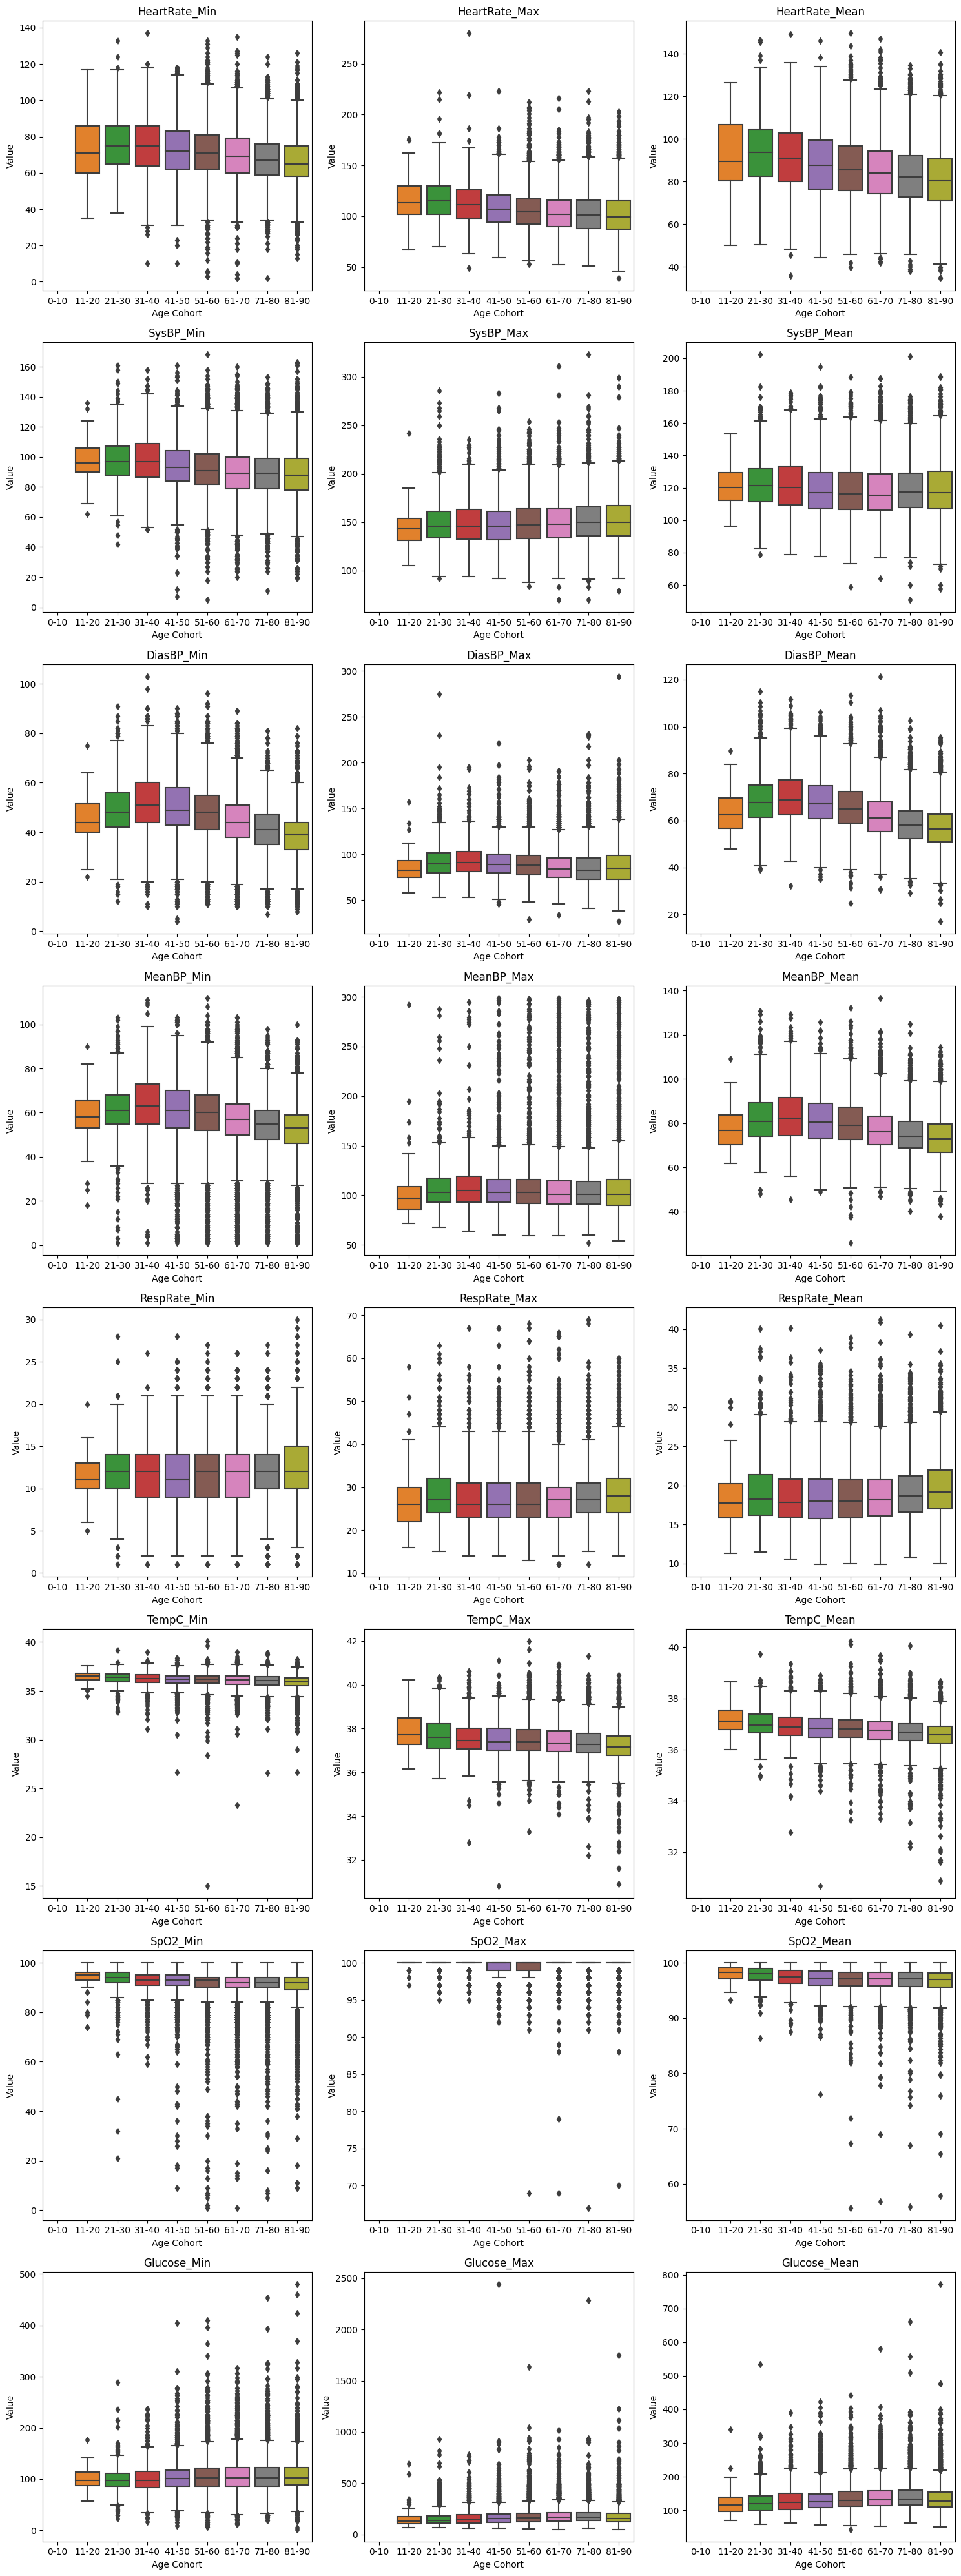

In [33]:
vital_signs = ['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean',
               'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
               'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
               'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']

# Define the number of rows and columns for subplots
num_rows = (len(vital_signs) // 3) + (len(vital_signs) % 3 > 0)  
num_cols = min(3, len(vital_signs)) 

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array if it's more than one row
axes = axes.flatten()

# Iterate over each vital sign and plot the boxplot
for i, vital_sign in enumerate(vital_signs):
    sns.boxplot(x='Age_Cohort', y=vital_sign, data=df_no_missing_values, ax=axes[i])
    axes[i].set_title(vital_sign)
    axes[i].set_xlabel('Age Cohort')
    axes[i].set_ylabel('Value')

# Hide any empty subplots
for j in range(len(vital_signs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Since we see differences in age for the vital signs, we will impute missing values based on the age cohort

In [34]:
# Group mean of the vitals by age cohort of the observations withput missing values as table for imputing the means
grouped_by_age = df_no_missing_values.groupby('Age_Cohort')[['HeartRate_Min', 'HeartRate_Max','HeartRate_Mean','SysBP_Min','SysBP_Max','SysBP_Mean',
 'DiasBP_Min', 'DiasBP_Max','DiasBP_Mean','MeanBP_Min','MeanBP_Max','MeanBP_Mean','RespRate_Min','RespRate_Max','RespRate_Mean',
 'TempC_Min','TempC_Max','TempC_Mean','SpO2_Min','SpO2_Max','SpO2_Mean','Glucose_Min','Glucose_Max','Glucose_Mean']].mean()

In [35]:
# Create age_cohorts for both, train and test data
df['Age_Cohort'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df_test['Age_Cohort'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)

In [36]:
# Impute means based on age cohort
for column in grouped_by_age.columns:
    # Fill missing values in df based on age cohort mean from grouped_by_age
    df[column] = df.apply(lambda row: row[column] if pd.notna(row[column]) else grouped_by_age.loc[row['Age_Cohort'], column], axis=1)
    df_test[column] = df_test.apply(lambda row: row[column] if pd.notna(row[column]) else grouped_by_age.loc[row['Age_Cohort'], column], axis=1)


Check, whether imputation worked

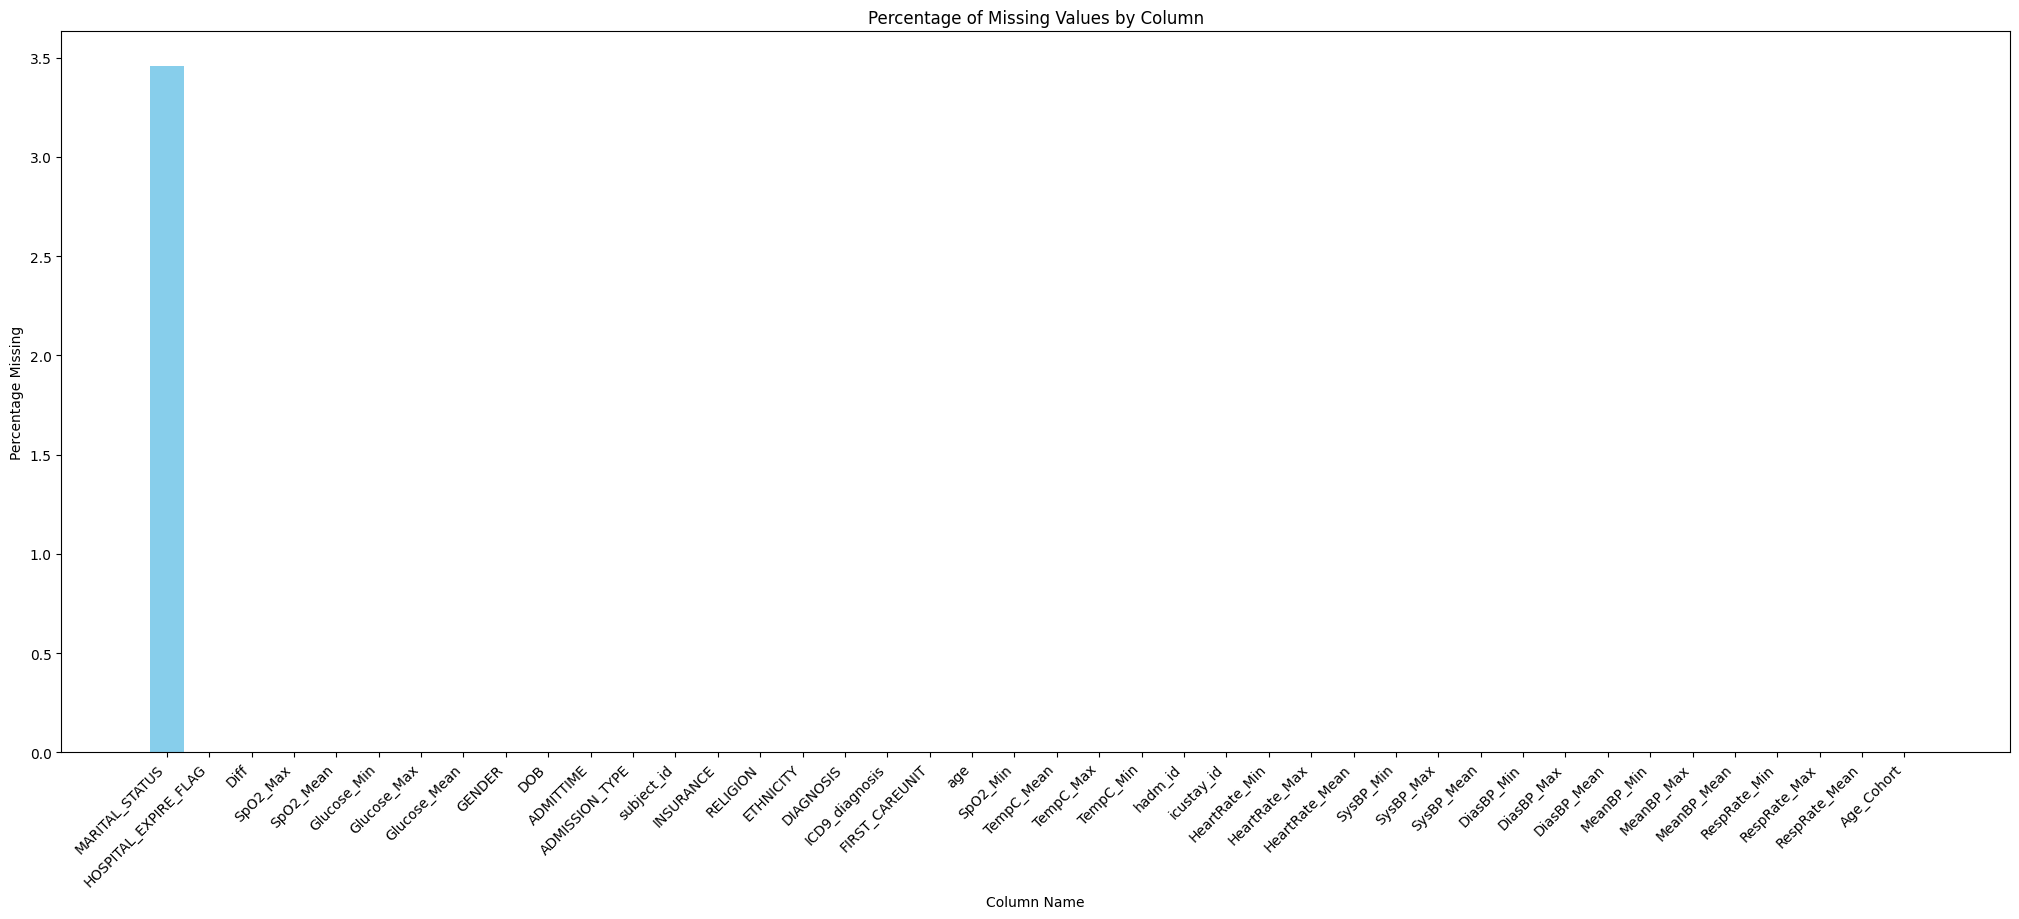


Columns with Missing Values (Descending Order):
MARITAL_STATUS: 3.46% (Categorical)


In [37]:
# Check train data
calculate_missing_info_print_only(df)

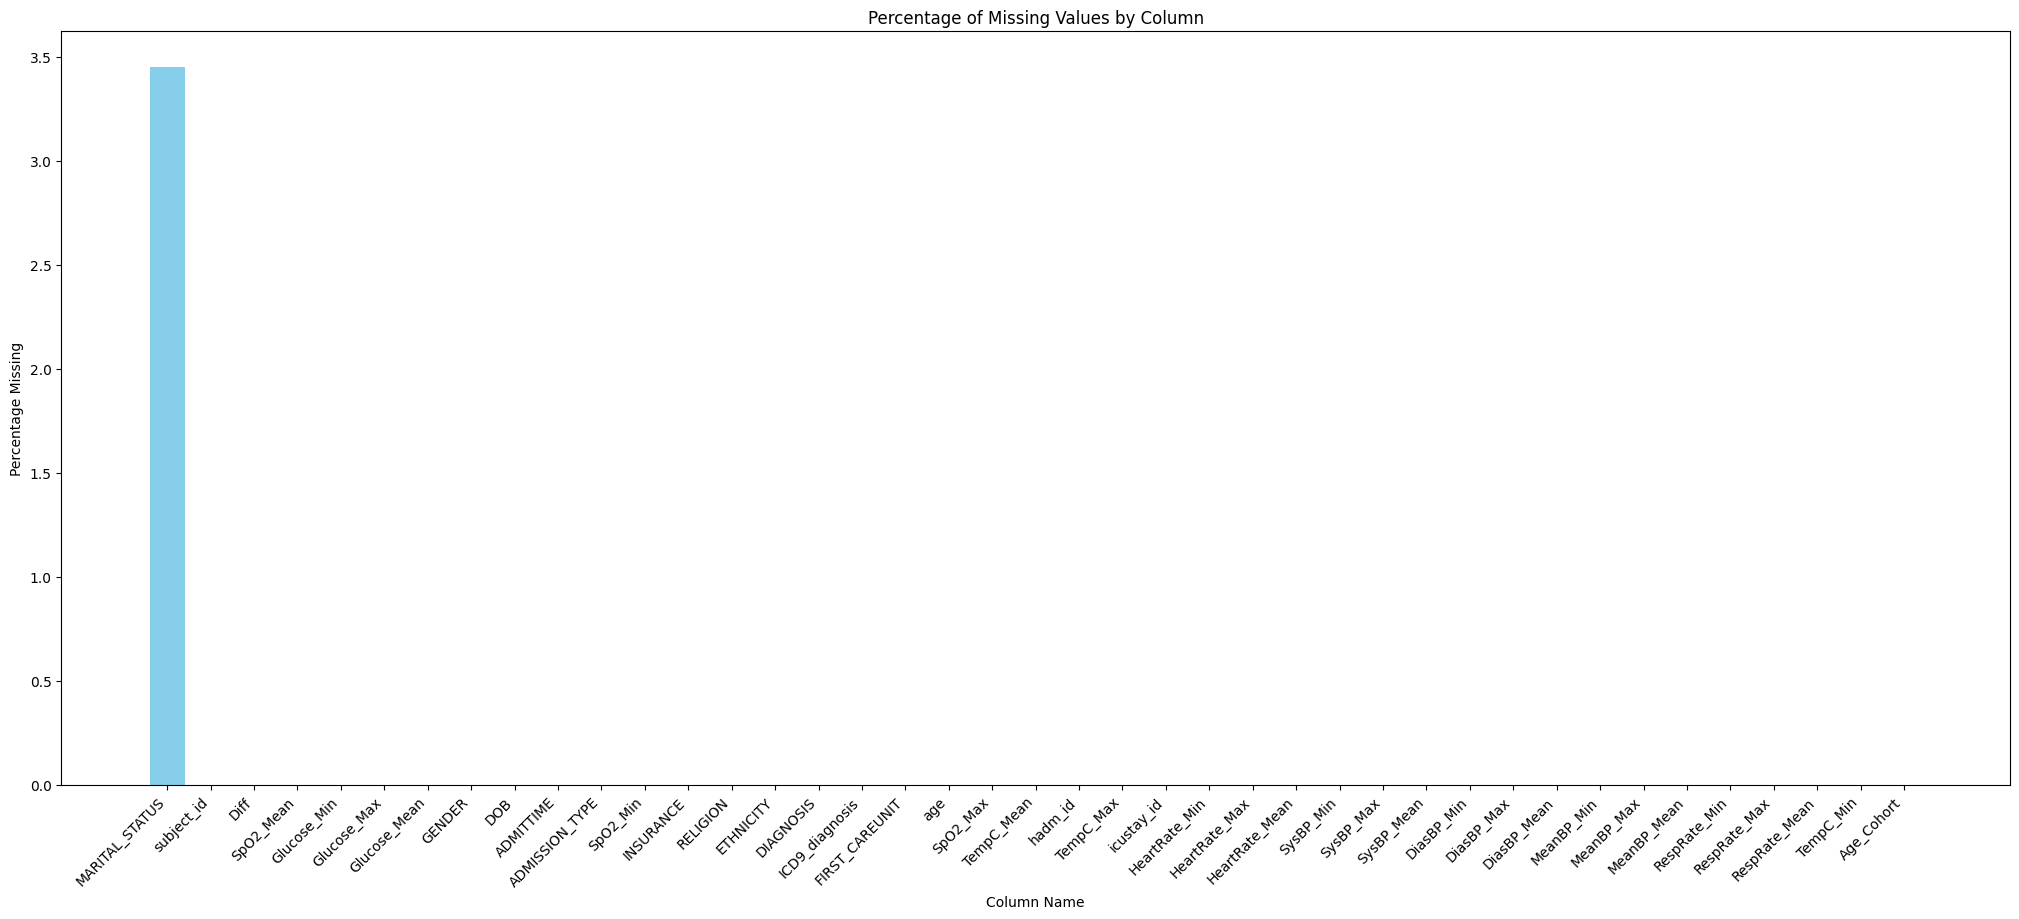


Columns with Missing Values (Descending Order):
MARITAL_STATUS: 3.45% (Categorical)


In [38]:
# Check test data
calculate_missing_info_print_only(df_test)

Now, there are only missing values for marital_status. Again, we will check whether the ones with missing values here have a higher mortality.

In [39]:
# Create dataframe for those where MARITAL_STATUS is missing
df_missing_marital = df[df['MARITAL_STATUS'].isna()]

# Create dataframe for those where MARITAL_STATUS is not missing
df_sub = df[df['MARITAL_STATUS'].notna()]

In [40]:
# Check mortality where MARITAL_STATUS is missing
df_missing_marital['HOSPITAL_EXPIRE_FLAG'].mean()

0.2548476454293629

In [41]:
# Check mortality where MARITAL_STATUS is not missing
df_sub['HOSPITAL_EXPIRE_FLAG'].mean()

0.10717651143183059

We observe a more than double as high mortality when marital status is missing. One explanation could be, that first the main data like the vitals are stored. If the person then dies early, there hasn't been the chance to ask this information. I will create a new column capturing whether MARITAL_STATUS is missing. 

In [42]:
# Create dummy variable in train and test data
df['missing_marital'] = df['MARITAL_STATUS'].isnull().astype(int)
df_test['missing_marital'] = df_test['MARITAL_STATUS'].isnull().astype(int)

In the dataset we have subject_id, indicating a person, and hadm_id, indicating the hospital. Since a person can go to several hospitals, we can observe how often a person has been to the ICU.

In [43]:
# Concatenate both dataframes to check the stays of one person
df_concat = pd.concat([df, df_test])
df_concat

HOSPITAL_EXPIRE_FLAG  subject_id  hadm_id  icustay_id  HeartRate_Min  \
0                      0.0       55440   195768      228357      89.000000   
1                      0.0       76908   126136      221004      63.000000   
2                      0.0       95798   136645      296315      81.000000   
3                      0.0       40708   102505      245557      76.000000   
4                      0.0       28424   127337      225281      67.928637   
...                    ...         ...      ...         ...            ...   
5216                   NaN       28941   107962      278087      63.000000   
5217                   NaN       27436   112243      266914      67.928637   
5218                   NaN       44232   156430      213413      74.000000   
5219                   NaN       76544   148900      286384      70.000000   
5220                   NaN       74677   189016      280741      80.000000   

      HeartRate_Max  HeartRate_Mean   SysBP_Min   SysBP_Max  SysBP_Mean  ...  \
0        145.000000      121.043478   74.000000  127.000000  106.586957  ...   
1        110.000000       79.117647   89.000000  121.000000  106.733333  ...   
2         98.000000       91.689655   88.000000  138.000000  112.785714  ...   
3        128.000000       98.857143   84.000000  135.000000  106.972973  ...   
4        103.662314       83.229845   89.014576  152.425752  119.080084  ...   
...             ...             ...         ...         ...         ...  ...   
5216     131.000000       97.130435  108.000000  140.000000  122.631579  ...   
5217     103.662314       83.229845   89.014576  152.425752  119.080084  ...   
5218      91.000000       81.488372  117.000000  171.000000  143.395349  ...   
5219      89.000000       80.276596   68.000000  137.000000  110.680851  ...   
5220     103.000000       90.516129   88.000000  125.000000  106.095238  ...   

      INSURANCE           RELIGION  MARITAL_STATUS               ETHNICITY  \
0      Medicare  PROTESTANT QUAKER          SINGLE                   WHITE   
1       Private       UNOBTAINABLE         MARRIED                   WHITE   
2      Medicare  PROTESTANT QUAKER       SEPARATED  BLACK/AFRICAN AMERICAN   
3      Medicare      NOT SPECIFIED         WIDOWED                   WHITE   
4      Medicare             JEWISH         WIDOWED                   WHITE   
...         ...                ...             ...                     ...   
5216   Medicare              OTHER          SINGLE                   WHITE   
5217   Medicare  PROTESTANT QUAKER         MARRIED                   WHITE   
5218   Medicare     GREEK ORTHODOX         WIDOWED         WHITE - RUSSIAN   
5219   Medicare           CATHOLIC        DIVORCED                   WHITE   
5220    Private      NOT SPECIFIED         MARRIED                   WHITE   

                                              DIAGNOSIS  ICD9_diagnosis  \
0                                GASTROINTESTINAL BLEED            5789   
1                             ESOPHAGEAL FOOD IMPACTION           53013   
2                                        UPPER GI BLEED           56983   
3                                     HIATAL HERNIA/SDA            5533   
4                                        ABDOMINAL PAIN           56211   
...                                                 ...             ...   
5216                                   MEDIASTINAL MASS           20152   
5217  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...            4241   
5218                     SMALL BOWEL OBSTRUCTION;SEPSIS           34839   
5219  CORONARY ARTERY DISEASE\AORTIC VALVE / ASCENDI...           41401   
5220      MITRAL STENOSIS\MITRAL VALVE REPLACEMENT /SDA            4240   

      FIRST_CAREUNIT  age  Age_Cohort  missing_marital  
0               MICU   69       61-70                0  
1               MICU   42       41-50                0  
2               MICU   68       61-70                0  
3               SICU   74       71-80     

In [44]:
subject_id_counts = df_concat['subject_id'].value_counts()
print(subject_id_counts)


# Create a new column 'subject_id_frequency' based on the counts
df_concat['subject_id_frequency'] = df_concat['subject_id'].map(subject_id_counts)

subject_id
109      29
73713    18
23657    17
5060     17
29035    17
         ..
29616     1
26860     1
72327     1
96323     1
76544     1
Name: count, Length: 19590, dtype: int64


I also want to indicate whether the observation we have is the last stay of the person or not. If we see another observation in the future, we can for sure say, that this person didn't die. I am aware, that this would not be possible in pracctice, when we just get the values of a new patient and we obviously don't know whether he will have an ICU stay in the future. Though, given the split of test and train data we have here, for some observations in the test data, we do see later observations in the train set, so that this feature should improve the model performance.

In [45]:
# Find the last admission for every subject
last_admission = df_concat.groupby('subject_id')['ADMITTIME'].max()

# Iterate through each row to check, whether the ADMITTIME equals the last_admission. If this is the case, there will be a 1 ont he column 'not_last_visit'
df_concat['not_last_visit'] = None
for index, row in df_concat.iterrows():
    if row['subject_id_frequency'] == 1:
        df_concat.at[index,'not_last_visit'] = 0
    else:
        if row['ADMITTIME'] == last_admission.loc[row['subject_id']]:
           df_concat.at[index,'not_last_visit'] = 0  
        else:
            df_concat.at[index,'not_last_visit'] = 1 

In [46]:
# Add a new column that indicates whether it is the first, second and so on visit
df_concat = df_concat.sort_values(by=['subject_id', 'ADMITTIME'])

df_concat['visit_nr'] = df.groupby('subject_id').cumcount() + 1

In [47]:
# Split dataframes again
df = df_concat[df_concat['HOSPITAL_EXPIRE_FLAG'].notna()]

df_test = df_concat[df_concat['HOSPITAL_EXPIRE_FLAG'].isna()]

#### Looking at outliers

outliers may appear in the cont_features

In [48]:
# Define the features where I want to check for outliers
cont_feat = ['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 
             'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 
             'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
             'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 
             'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 
             'TempC_Min', 'TempC_Max', 'TempC_Mean',
             'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 
             'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']

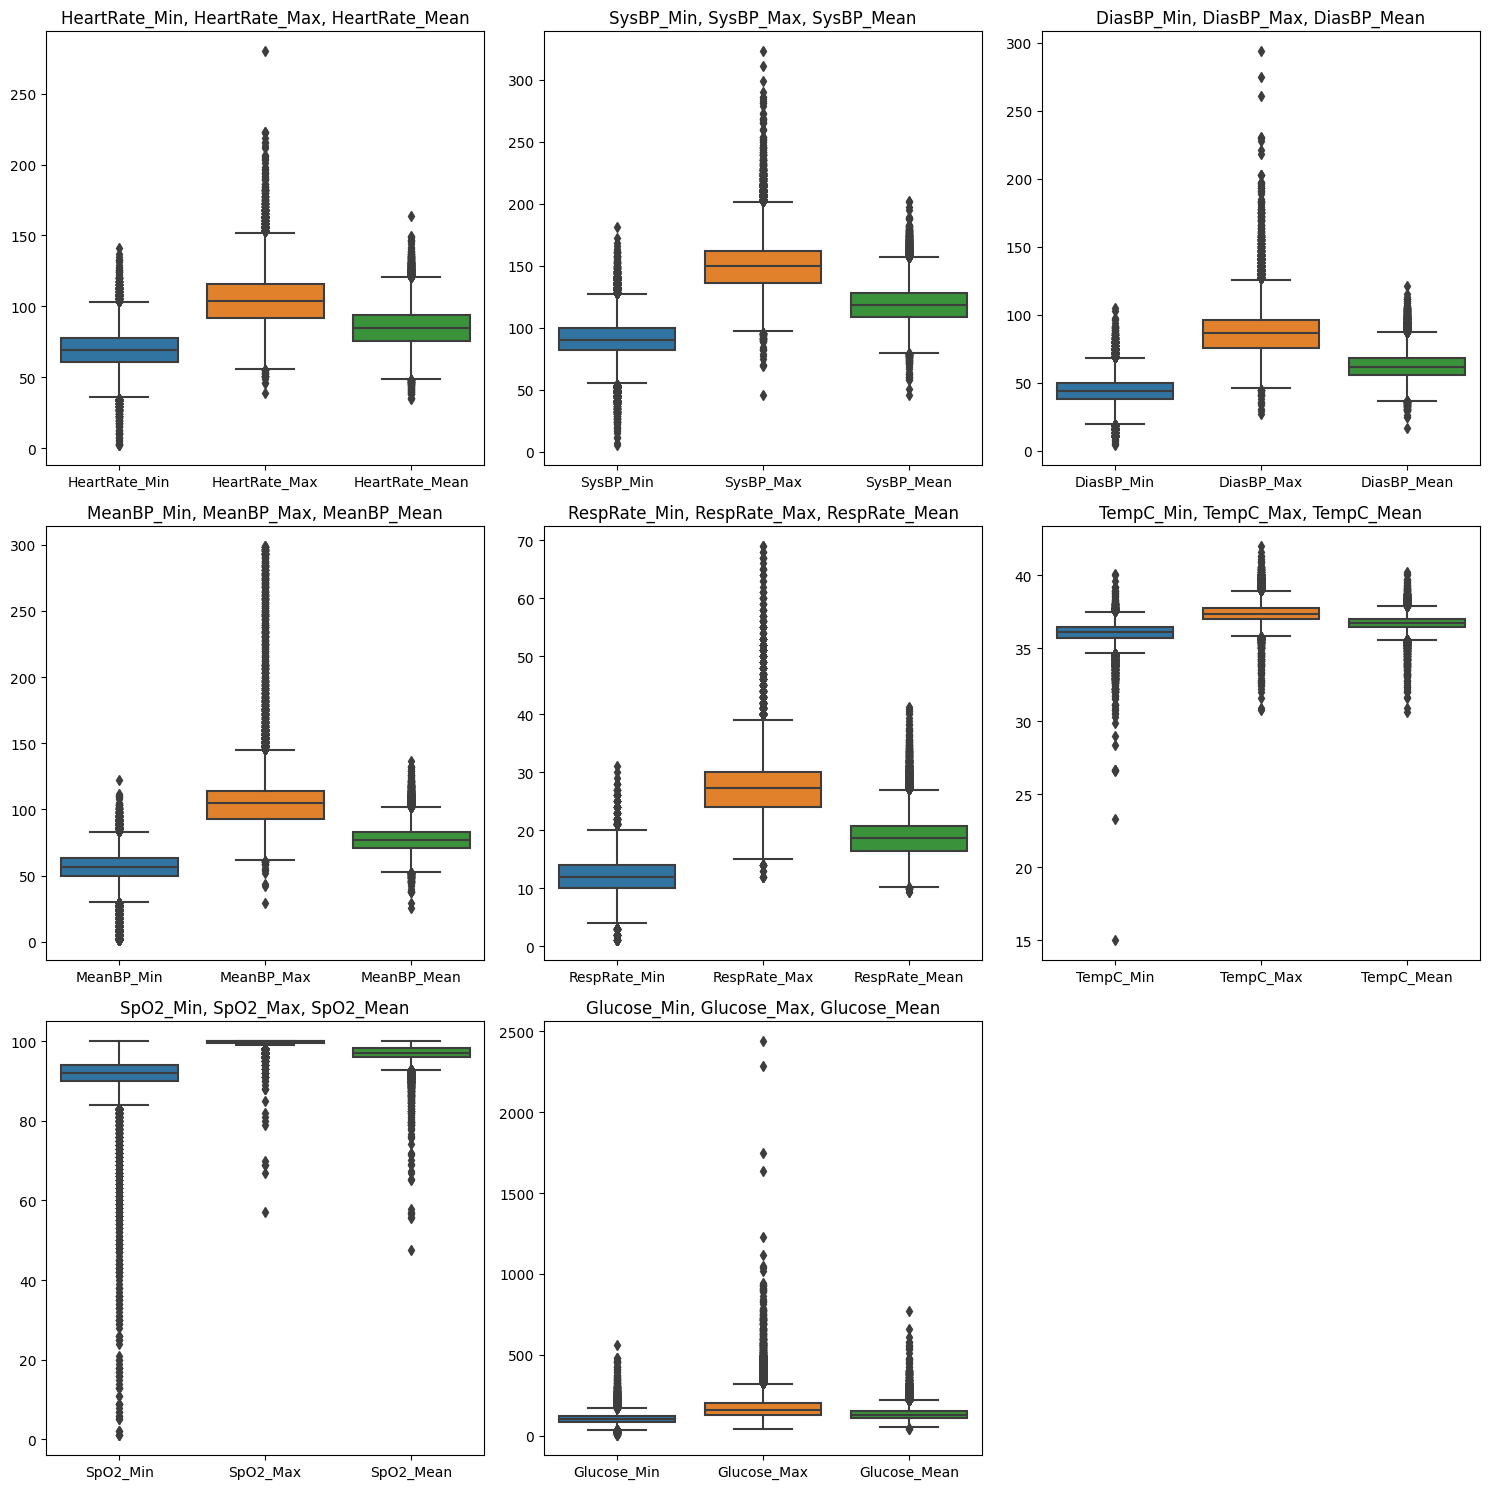

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Plot boxplots for each set of 3 continuous features
for i in range(len(cont_feat) // 3):
    features_subset = cont_feat[i * 3: (i + 1) * 3]
    sns.boxplot(data=df[features_subset], ax=axes[i])
    axes[i].set_title(', '.join(features_subset))

# Hide empty subplots
for j in range(len(cont_feat) // 3, 3 * 3):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We see a lot of outliers for all variables. Let's see, whether the outliers have a higher mortality.

In [50]:
# Initialize ductionary
outlier_means = {}

# Iterate over each continuous feature
for feature in cont_feat:
    # Select the feature column
    feature_column = df[feature]
    
    # Calculate the 25th and 75th percentiles
    q25 = feature_column.quantile(0.25)
    q75 = feature_column.quantile(0.75)
    
    # Calculate the interquartile range
    iqr = q75 - q25
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    
    # Find rows where the feature values are outliers
    outlier_rows = (feature_column < lower_bound) | (feature_column > upper_bound)
    
    # Calculate the mean of the 'HOSPITAL_EXPIRE_FLAG' column for the outlier subset
    outlier_means[feature] = df.loc[outlier_rows, 'HOSPITAL_EXPIRE_FLAG'].mean()

# Print the means for each feature
for feature, mean in outlier_means.items():
    print(f"Mean Mortality for outlier values in feature '{feature}': {mean}")

Mean Mortality for outlier values in feature 'HeartRate_Min': 0.3609022556390977
Mean Mortality for outlier values in feature 'HeartRate_Max': 0.289532293986637
Mean Mortality for outlier values in feature 'HeartRate_Mean': 0.28169014084507044
Mean Mortality for outlier values in feature 'SysBP_Min': 0.29671574178935445
Mean Mortality for outlier values in feature 'SysBP_Max': 0.16583747927031509
Mean Mortality for outlier values in feature 'SysBP_Mean': 0.18548387096774194
Mean Mortality for outlier values in feature 'DiasBP_Min': 0.17291666666666666
Mean Mortality for outlier values in feature 'DiasBP_Max': 0.13885350318471337
Mean Mortality for outlier values in feature 'DiasBP_Mean': 0.13227513227513227
Mean Mortality for outlier values in feature 'MeanBP_Min': 0.23776223776223776
Mean Mortality for outlier values in feature 'MeanBP_Max': 0.17943548387096775
Mean Mortality for outlier values in feature 'MeanBP_Mean': 0.15517241379310345
Mean Mortality for outlier values in feature 

We see, that outliers in the vital signs show a higher mortality. For outliers were the mortality is over 20%, I will create a column to show the severity as a dummy.

In [51]:
# Define features where outliers are dangerous (mortality > 20%)
dangerous_outliers = ['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 
             'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 
             'DiasBP_Min', 'MeanBP_Min', 
             'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 
             'TempC_Min', 'TempC_Max', 'TempC_Mean',
             'SpO2_Min',  'SpO2_Mean', 'Glucose_Min']

In [52]:
# Create outlier column for all dangerous features
for var in dangerous_outliers:
    # Select the feature column
    feature_column = df[var]
    
    # Calculate the 25th and 75th percentiles
    q25 = feature_column.quantile(0.25)
    q75 = feature_column.quantile(0.75)
    
    # Calculate the interquartile range
    iqr = q75 - q25
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    
    # boolean for outliers
    outliers = feature_column.apply(lambda x: x < lower_bound or x > upper_bound)

    df[f'outlier_{var}'] = outliers.astype(int)
    df_test[f'outlier_{var}'] = outliers.astype(int)

C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\608427903.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'outlier_{var}'] = outliers.astype(int)
C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\608427903.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[f'outlier_{var}'] = outliers.astype(int)
C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\608427903.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Now, that the higher risks due to outliers in these columns is saved, I can treat the outliers. For that, there are several possibilities:
- Replace them with the mean
- Winsorizing  
I decided to do winsorizing, because as we saw with the mean mortality, higher or lower values than the mean do indicate a higher risk for the patient. With winsorizing, these risks are still captured in the values while reducing the noise by outlier treatment.

In [53]:
def winsorize(data, limits=(0.05, 0.05)): # I use 0.05 as limits, because it gave me the best score in my cross validation (also used 0.01 and 0.1)
    """
    Winsorize a dataset by replacing extreme values with less extreme values.

    Arguments:
    - data: 1-D array or list, the dataset to be winsorized.
    - limits: Tuple of two floats (lower, upper), representing the fraction of values to be replaced
              on each tail. Default is (0.05, 0.05), which replaces 5% of the values on each tail.

    Returns:
    - winsorized_data: 1-D array, the winsorized dataset.
    """
    # Copy the input data to avoid modifying the original array
    winsorized_data = np.copy(data)


    # Calculating the lower and upper limits for winsorization
    lower_limit = np.percentile(winsorized_data, limits[0] * 100)
    upper_limit = np.percentile(winsorized_data, 100 - limits[1] * 100)

    # Replacing values below the lower limit with the lower limit
    winsorized_data[winsorized_data < lower_limit] = lower_limit

    # Replacing values above the upper limit with the upper limit
    winsorized_data[winsorized_data > upper_limit] = upper_limit

    return winsorized_data

In [54]:
# Winsorize in train and test set
for var in cont_feat:
    df[var] = winsorize(df[var])
    df_test[var] = winsorize(df_test[var])


C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\1677839447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = winsorize(df[var])
C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\1677839447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[var] = winsorize(df_test[var])


#### Look at correlation between numerical variables

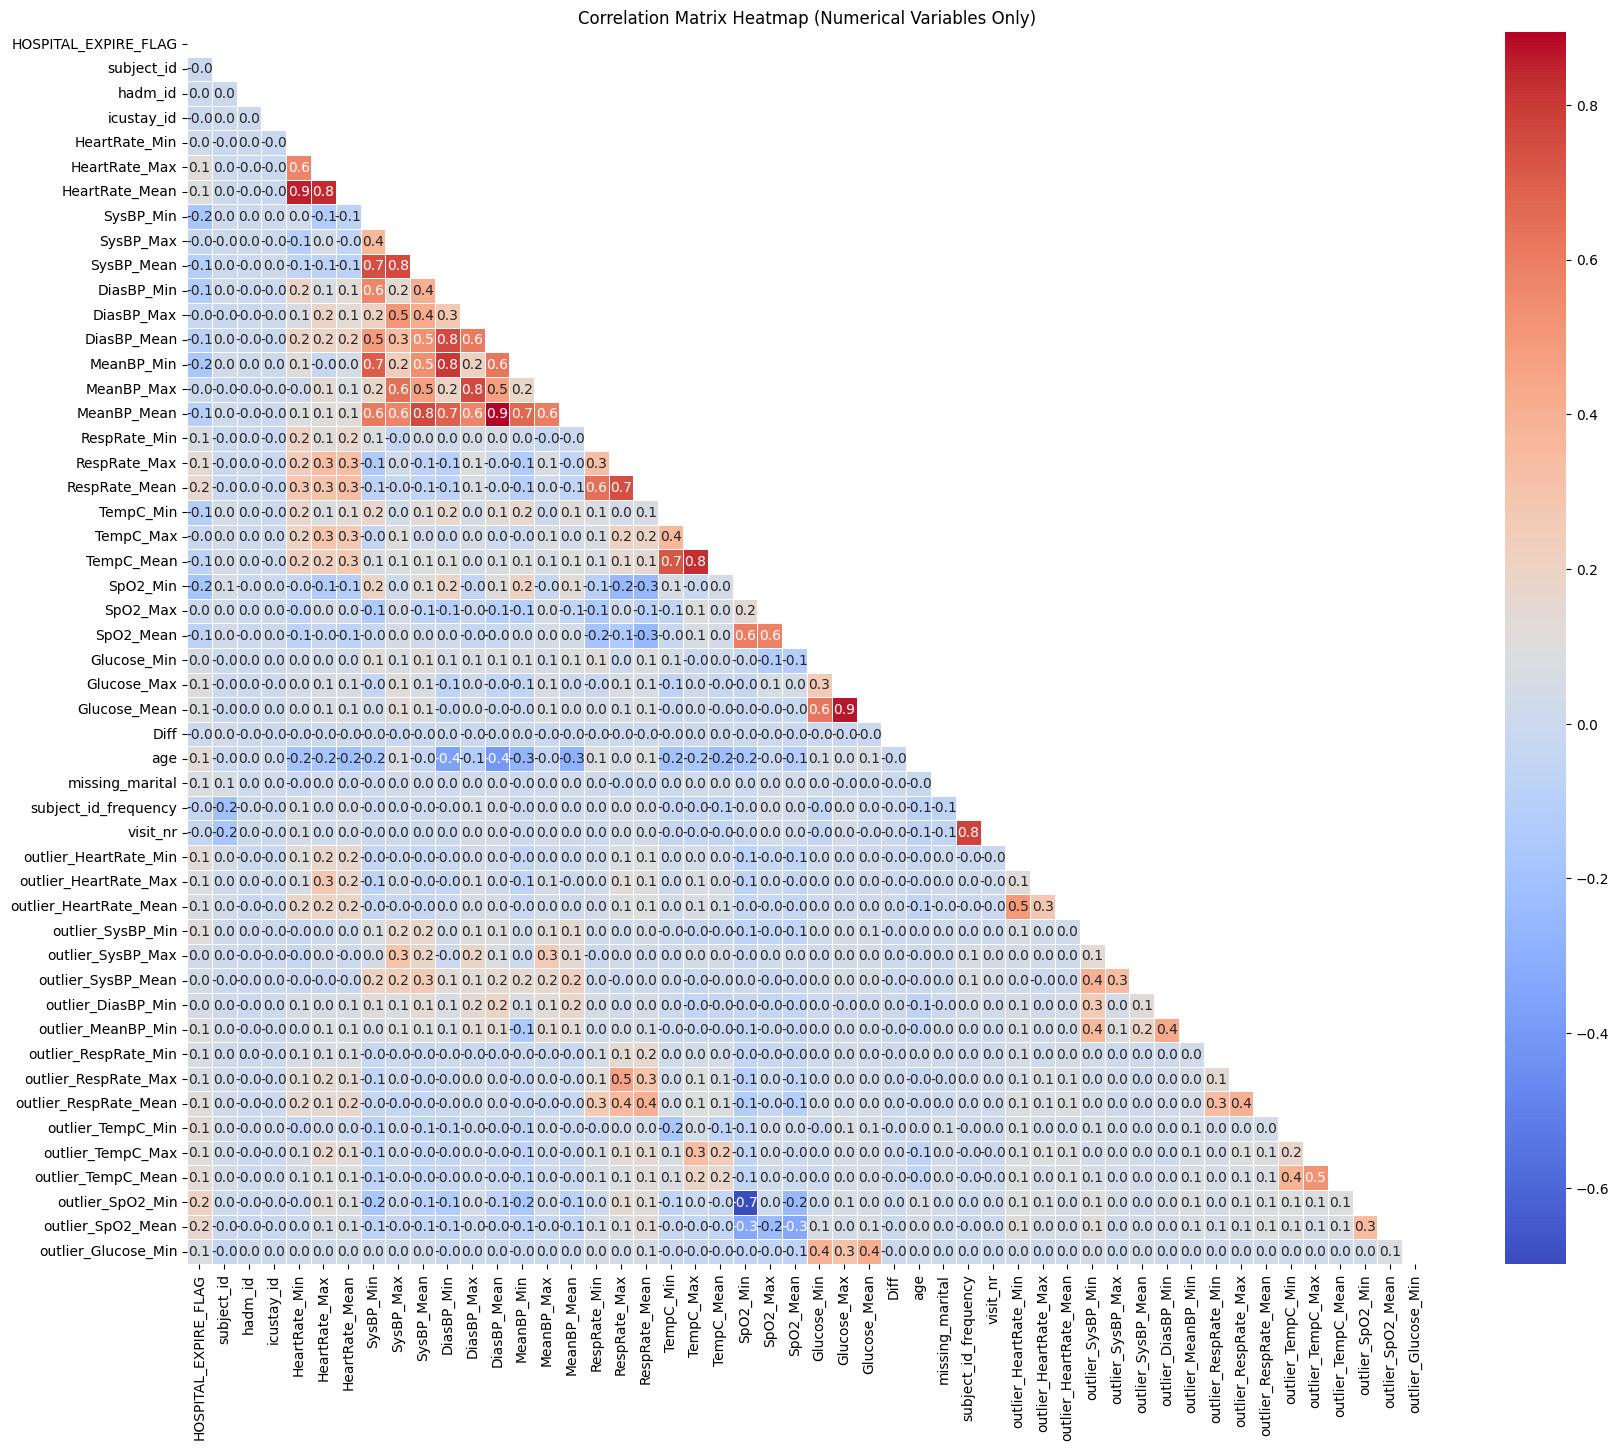

In [55]:
# Selecting numerical columns except those to be excluded
numerical_columns = [col for col in df.select_dtypes(include='number').columns]

# Creating a new dataframe with only the selected numerical columns
selected_df = df[numerical_columns]

# Correlation matrix 
correlation_matrix = selected_df.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(20, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, mask=matrix)
plt.title("Correlation Matrix Heatmap (Numerical Variables Only)")
plt.show()

To handle the multicollinearity, I wanted to create only 1 column for each vital sign, using the product of the 3 corresponding columns (e.g. HeartRate = HeartRate_min * HeartRate_Max * HeartRate_Mean). I chose the product to better capture the effect of very high or low values compared to taking the mean. Though, doing this made by model worse. The code can be seen in the Appendix.

### 2.1 Categorical Variables

I have to deal with these variables:  
- GENDER
- ADMISSION_TYPE
- INSURANCE
- RELIGION
- MARITAL_STATUS
- ETHNICITY
- DIAGNOSIS
- FIRST_CAREUNIT  
To check, whether I want to include them in my prediction model, I will group by the feature and see whether there are differences in the mean mortality. If this is the case, I can assume that this feature has an impact on the mortality. If then the number of different labels in the feature is small enough, I can just use dummy variables to use the feature in my model.

In [56]:
def check_categorical_variables(df, variable):
    # Look at number of labels in the categorical variable
    print(df[variable].nunique())

    # Look at distribution among these labels
    print(df[variable].value_counts())

    # Look at differences in mortality mean
    print(df.groupby(variable)['HOSPITAL_EXPIRE_FLAG'].mean())

##### GENDER

In [57]:
check_categorical_variables(df, 'GENDER')

2
GENDER
M    11759
F     9126
Name: count, dtype: int64
GENDER
F    0.115823
M    0.109533
Name: HOSPITAL_EXPIRE_FLAG, dtype: float64


We see only a small difference between gender. As a result, I will not include gender for my predicition model.

##### ADMISSION_TYPE

In [58]:
check_categorical_variables(df, 'ADMISSION_TYPE')

3
ADMISSION_TYPE
EMERGENCY    17817
ELECTIVE      2848
URGENT         220
Name: count, dtype: int64
ADMISSION_TYPE
ELECTIVE     0.032654
EMERGENCY    0.125554
URGENT       0.068182
Name: HOSPITAL_EXPIRE_FLAG, dtype: float64


There are high differences in mortality for the ADMISSION_TYPE and we have only 3 different labels. This column will also be dummy encoded.

In [59]:
# Encode column ADMISSION_TYPE
df = pd.get_dummies(df, columns= ['ADMISSION_TYPE'], drop_first=False)
df_test = pd.get_dummies(df_test, columns= ['ADMISSION_TYPE'], drop_first=False)

##### INSURANCE

In [60]:
check_categorical_variables(df, 'INSURANCE')

5
INSURANCE
Medicare      11718
Private        6245
Medicaid       2117
Government      611
Self Pay        194
Name: count, dtype: int64
INSURANCE
Government    0.058920
Medicaid      0.079358
Medicare      0.134494
Private       0.085989
Self Pay      0.144330
Name: HOSPITAL_EXPIRE_FLAG, dtype: float64


There are also high differences in mortality for the INSURANCE_TYPE. Also, we have only 5 different labels. This column will also be dummy encoded.

In [61]:
# Encode column INSURANCE
df = pd.get_dummies(df, columns= ['INSURANCE'], drop_first=False)
df_test = pd.get_dummies(df_test, columns= ['INSURANCE'], drop_first=False)

##### RELIGION

In [62]:
check_categorical_variables(df, 'RELIGION')

17
RELIGION
CATHOLIC                  7655
NOT SPECIFIED             5398
PROTESTANT QUAKER         2753
JEWISH                    1840
UNOBTAINABLE              1515
OTHER                      702
EPISCOPALIAN               288
GREEK ORTHODOX             178
CHRISTIAN SCIENTIST        164
BUDDHIST                   109
MUSLIM                      74
UNITARIAN-UNIVERSALIST      54
JEHOVAH'S WITNESS           45
ROMANIAN EAST. ORTH         41
HINDU                       38
7TH DAY ADVENTIST           30
HEBREW                       1
Name: count, dtype: int64
RELIGION
7TH DAY ADVENTIST         0.033333
BUDDHIST                  0.110092
CATHOLIC                  0.108295
CHRISTIAN SCIENTIST       0.091463
EPISCOPALIAN              0.083333
GREEK ORTHODOX            0.112360
HEBREW                    1.000000
HINDU                     0.131579
JEHOVAH'S WITNESS         0.111111
JEWISH                    0.127174
MUSLIM                    0.108108
NOT SPECIFIED             0.099296
OTHER 

Also for RELIGION we see varying mortality rates. A reason for that could be that some religions may not allow certain forms of therapies. 17 categories seems a lot compared to the the other variables. But since we have over 20,000 observations, it is still valid to use one-hot encoding.

Since we only have 1 observation for HEBEW and we have none in the test data, I will change that to JEWISH

In [63]:
df.loc[df['RELIGION'] == 'HEBREW', 'RELIGION'] = 'JEWISH'

In [64]:
# Encode column RELIGION
df = pd.get_dummies(df, columns= ['RELIGION'], drop_first=False)
df_test = pd.get_dummies(df_test, columns= ['RELIGION'], drop_first=False)

##### MARITAL_STATUS

In [65]:
check_categorical_variables(df, 'MARITAL_STATUS')

7
MARITAL_STATUS
MARRIED              9664
SINGLE               5910
WIDOWED              2819
DIVORCED             1413
SEPARATED             240
UNKNOWN (DEFAULT)     103
LIFE PARTNER           14
Name: count, dtype: int64
MARITAL_STATUS
DIVORCED             0.113942
LIFE PARTNER         0.000000
MARRIED              0.111755
SEPARATED            0.108333
SINGLE               0.081218
UNKNOWN (DEFAULT)    0.252427
WIDOWED              0.137637
Name: HOSPITAL_EXPIRE_FLAG, dtype: float64


Most of the marital status have a mean mortality around the overall average. It is noticable that the status UNKNOWN has a very high mortality (25%). Also, this value is very similar to the mortality when MARIAL_STATUS is missing. Because of that, I will also put a 1 for the column 'missing_marital_ when the MARITAL_STATUS is UNKNOWN. The other values will not be encoded and not be used in the prediction model.

In [66]:
# Identify rows where MARITAL_STATUS is unknown for train
unknown_marital_status = df['MARITAL_STATUS'] == 'UNKNOWN (DEFAULT)'

# Set the value in the missing_marital column in train to 1 for these rows
df.loc[unknown_marital_status, 'missing_marital'] = 1

In [67]:
# Identify rows where MARITAL_STATUS is unknown for test
unknown_marital_status = df_test['MARITAL_STATUS'] == 'UNKNOWN (DEFAULT)'

# Set the value in the missing_marital column in test to 1 for these rows
df_test.loc[unknown_marital_status, 'missing_marital'] = 1

##### ETHNICITY

In [68]:
check_categorical_variables(df, 'ETHNICITY')

41
ETHNICITY
WHITE                                                       15112
BLACK/AFRICAN AMERICAN                                       1977
UNABLE TO OBTAIN                                              577
UNKNOWN/NOT SPECIFIED                                         568
HISPANIC OR LATINO                                            562
OTHER                                                         489
ASIAN                                                         265
PATIENT DECLINED TO ANSWER                                    175
HISPANIC/LATINO - PUERTO RICAN                                155
ASIAN - CHINESE                                               146
BLACK/CAPE VERDEAN                                            126
WHITE - RUSSIAN                                               117
BLACK/HAITIAN                                                  72
HISPANIC/LATINO - DOMINICAN                                    59
ASIAN - ASIAN INDIAN                                           

Since we have 71 different ethnicties and don't see much difference, I will not encode this column and not include it in my model. I am aware, that some ethnicities like ASIAN - JAPANESE have high mortalities, though, there are only 6 observations so that we don't have enough evidence that the ethnicity has a impact.

##### DIAGNOSIS

For the main diagnosis we have 2 columns: DIAGNOSIS, what is a short description, and the ICD9_Code, which is a numerical code of the main diagnosis. Besides, there are 2 more datasets. One contins the long description for each diagnosis (meta_data) and the other one shows the history of all diagnoses for a patient per hospital (diagnoses).

In [69]:
df['ICD9_diagnosis'].nunique()

1853

We have ober 1,800 different diagnoses in the train data. It is obvious, that we shuld not use dummy encoding for theis. 

In [70]:
#Look at extra data diagnoses
diagnoses = pd.read_csv("C:/Users/vanes/Desktop/BSE/Term 2/Computational Learning and Deep Learning/HW1/MIMIC_diagnoses.csv")

diagnoses

SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0              256   108811      1.0     53240
1              256   108811      2.0     41071
2              256   108811      3.0     53560
3              256   108811      4.0     40390
4              256   108811      5.0      5859
...            ...      ...      ...       ...
651042       65535   178280      5.0      5119
651043       65535   178280      6.0      5990
651044       65535   178280      7.0      0414
651045       65535   178280      8.0     25000
651046       65535   178280      9.0      4019

[651047 rows x 4 columns]

In [71]:
print(diagnoses['SEQ_NUM'].max())

39.0


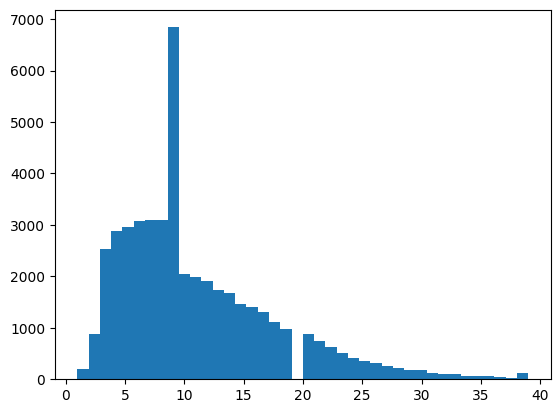

In [72]:
# Look at number of diagnoses per patient
diagnoses_per_patient = diagnoses.groupby('SUBJECT_ID')['SEQ_NUM'].max()
plt.hist(diagnoses_per_patient, bins=40)
plt.show()

We can see that a lot of patients have more than 1 diagnosisis. The maximum is 39, though we see a cut at 10. Because of that, I will include all the diagnoses in my data. Additionally, I will include the max number of diagnoses

In [73]:
# Create df with maximum SEQ_NUM per patient and hospital.
diagnoses_per_patient = pd.DataFrame(diagnoses.groupby(['SUBJECT_ID', 'HADM_ID'])['SEQ_NUM'].max()).reset_index()
subject_id_duplicates = diagnoses_per_patient['SUBJECT_ID'].duplicated(keep=False)
filtered_diagnoses_per_patient = diagnoses_per_patient[subject_id_duplicates]

# Print or use the filtered DataFrame
print(filtered_diagnoses_per_patient)

       SUBJECT_ID  HADM_ID  SEQ_NUM
13             17   161087      8.0
14             17   194023      4.0
18             21   109451     18.0
19             21   111970     21.0
21             23   124321     10.0
...           ...      ...      ...
58951       99923   164914     13.0
58952       99923   192053     18.0
58967       99982   112748     13.0
58968       99982   151454      9.0
58969       99982   183791     16.0

[19993 rows x 3 columns]


We see, that for each patients, the frequence begins again when he changes the hospital (HADM_ID).

In [74]:
# Include SEQ_NUM in both, train and test df
df = pd.merge(df, filtered_diagnoses_per_patient, left_on=['subject_id', 'hadm_id'], right_on=['SUBJECT_ID', 'HADM_ID'], how='left')
df_test = pd.merge(df_test, filtered_diagnoses_per_patient, left_on=['subject_id', 'hadm_id'], right_on=['SUBJECT_ID', 'HADM_ID'], how='left')

Not all patients have  a history. For missing values I will just input a 1 

In [75]:
df['SEQ_NUM'].fillna(1, inplace=True)
df_test['SEQ_NUM'].fillna(1, inplace=True)

In [76]:
df.head()

HOSPITAL_EXPIRE_FLAG  subject_id  hadm_id  icustay_id  HeartRate_Min  \
0                   0.0          23   124321      234044      59.000000   
1                   0.0          34   144319      290505      48.000000   
2                   0.0          36   165660      241249      67.000000   
3                   0.0          85   112077      291697      79.000000   
4                   0.0         109   166018      241668      75.513158   

   HeartRate_Max  HeartRate_Mean   SysBP_Min   SysBP_Max  SysBP_Mean  ...  \
0     115.000000       76.694444   65.000000  181.000000  122.180000  ...   
1      76.000000       62.375862  107.000000  169.000000  128.055556  ...   
2      94.000000       82.255814   84.000000  152.000000  115.609756  ...   
3     136.000000      103.357143   73.000000  166.000000  104.700000  ...   
4     117.173977       93.513136   97.483918  150.074561  122.589668  ...   

   RELIGION_MUSLIM  RELIGION_NOT SPECIFIED  RELIGION_OTHER  \
0            False                   False           False   
1            False                   False           False   
2            False                    True           False   
3            False                   False           False   
4            False                    True           False   

   RELIGION_PROTESTANT QUAKER  RELIGION_ROMANIAN EAST. ORTH  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   RELIGION_UNITARIAN-UNIVERSALIST  RELIGION_UNOBTAINABLE  SUBJECT_ID  \
0                            False                  False        23.0   
1                            False                  False        34.0   
2                            False                  False        36.0   
3                            False                  False        85.0   
4                            False                  False       109.0   

    HADM_ID  SEQ_NUM  
0  124321.0     10.0  
1  144319.0      8.0  
2  165660.0     12.0  
3  112077.0     19.0  
4  166018.0     11.0  

[5 rows x 87 columns]

To also consider the history of diagnoses in the prediction, I have to include them in my train and test dataframes.

In [77]:
# Convert subject_id and hadm_id in all dataframes to integers
diagnoses['SUBJECT_ID'] = diagnoses['SUBJECT_ID'].astype(int)
diagnoses['HADM_ID'] = diagnoses['HADM_ID'].astype(int)

df['subject_id'] = df['subject_id'].astype(int)
df['hadm_id'] = df['hadm_id'].astype(int)

df_test['subject_id'] = df_test['subject_id'].astype(int)
df_test['hadm_id'] = df_test['hadm_id'].astype(int)

# Make pivot table from diagnoses to have only one line per patient and hospital
pivot_df = diagnoses.pivot_table(index=['SUBJECT_ID', 'HADM_ID'], columns=['SEQ_NUM'], values=['ICD9_CODE'], aggfunc='first')

pivot_df.columns = [f'ICD9_CODE_{int(col[1])}' if col[1] else col[0] for col in pivot_df.columns]

pivot_df.reset_index(inplace=True)

# Merge the diagnoses to train and test 
df = pd.merge(df, pivot_df, how='left', left_on=['subject_id', 'hadm_id'], right_on=['SUBJECT_ID', 'HADM_ID'])
df_test = pd.merge(df_test, pivot_df, how='left', left_on=['subject_id', 'hadm_id'], right_on=['SUBJECT_ID', 'HADM_ID'])

In [78]:
df.head()

HOSPITAL_EXPIRE_FLAG  subject_id  hadm_id  icustay_id  HeartRate_Min  \
0                   0.0          23   124321      234044      59.000000   
1                   0.0          34   144319      290505      48.000000   
2                   0.0          36   165660      241249      67.000000   
3                   0.0          85   112077      291697      79.000000   
4                   0.0         109   166018      241668      75.513158   

   HeartRate_Max  HeartRate_Mean   SysBP_Min   SysBP_Max  SysBP_Mean  ...  \
0     115.000000       76.694444   65.000000  181.000000  122.180000  ...   
1      76.000000       62.375862  107.000000  169.000000  128.055556  ...   
2      94.000000       82.255814   84.000000  152.000000  115.609756  ...   
3     136.000000      103.357143   73.000000  166.000000  104.700000  ...   
4     117.173977       93.513136   97.483918  150.074561  122.589668  ...   

   ICD9_CODE_30  ICD9_CODE_31  ICD9_CODE_32  ICD9_CODE_33  ICD9_CODE_34  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   ICD9_CODE_35  ICD9_CODE_36  ICD9_CODE_37  ICD9_CODE_38  ICD9_CODE_39  
0           NaN           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN           NaN  

[5 rows x 128 columns]

Because we have a lot of different diagnosis, I will first try to reduce the dimensionality. For that, I will cluster diagnosises with a high cosine similarity (>0.8) and code them to only one ICD9_Code.

In [79]:
# Load meta_data
meta_data = pd.read_csv("C:/Users/vanes/Desktop/BSE/Term 2/Computational Learning and Deep Learning/HW1/MIMIC_metadata_diagnose.csv")

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer and transform descriptions into a document-term matrix
dtm = tfidf_vectorizer.fit_transform(meta_data['LONG_DIAGNOSE'])

# Compute cosine similarity between descriptions
cosine_sim = cosine_similarity(dtm)

# Find similar diagnoses and group them
threshold = 0.8  
diagnosis_groups = {}
for i, diagnosis_code in enumerate(meta_data['ICD9_CODE']):
    # Check if the diagnosis has already been assigned to a group
    if diagnosis_code not in diagnosis_groups:
        # Find similar diagnoses based on cosine similarity
        similar_indices = (cosine_sim[i] > threshold).nonzero()[0]
        similar_diagnoses = meta_data.iloc[similar_indices]['ICD9_CODE'].tolist()
        # Add the diagnosis and its similar diagnoses to the group
        diagnosis_groups[diagnosis_code] = similar_diagnoses

# Print or use diagnosis_groups as needed
for representative_diagnosis, similar_diagnoses in diagnosis_groups.items():
    print(f"Group for diagnosis {representative_diagnosis}:")
    print(similar_diagnoses)
    print()

Group for diagnosis 436:
['436', '4378']

Group for diagnosis 78001:
['78001']

Group for diagnosis E0062:
['E0062']

Group for diagnosis 0460:
['0460']

Group for diagnosis 30752:
['30752']

Group for diagnosis E9601:
['E9601']

Group for diagnosis E0051:
['E0051']

Group for diagnosis 78603:
['78603']

Group for diagnosis 4292:
['4292']

Group for diagnosis 7897:
['7897', '7880']

Group for diagnosis 7862:
['7862']

Group for diagnosis 4644:
['4644']

Group for diagnosis 7823:
['7823']

Group for diagnosis 68101:
['68101']

Group for diagnosis E0072:
['E0072']

Group for diagnosis 1360:
['1360']

Group for diagnosis 31501:
['31501']

Group for diagnosis 43884:
['43884']

Group for diagnosis E0080:
['E0080']

Group for diagnosis 7271:
['7271']

Group for diagnosis 05101:
['05101']

Group for diagnosis 061:
['061']

Group for diagnosis 3671:
['3671']

Group for diagnosis 78261:
['78261']

Group for diagnosis 071:
['071']

Group for diagnosis 99591:
['99591']

Group for diagnosis E0121:

In [81]:
col_list = ['ICD9_diagnosis', 'ICD9_CODE_1', 'ICD9_CODE_2', 'ICD9_CODE_3',
       'ICD9_CODE_4', 'ICD9_CODE_5', 'ICD9_CODE_6', 'ICD9_CODE_7',
       'ICD9_CODE_8', 'ICD9_CODE_9', 'ICD9_CODE_10',  'ICD9_CODE_11', 'ICD9_CODE_12', 'ICD9_CODE_13',
       'ICD9_CODE_14', 'ICD9_CODE_15', 'ICD9_CODE_16', 'ICD9_CODE_17',
       'ICD9_CODE_18', 'ICD9_CODE_19',  'ICD9_CODE_20', 'ICD9_CODE_21', 'ICD9_CODE_22', 'ICD9_CODE_23',
       'ICD9_CODE_24', 'ICD9_CODE_25', 'ICD9_CODE_26', 'ICD9_CODE_27',
       'ICD9_CODE_28', 'ICD9_CODE_29',  'ICD9_CODE_30', 'ICD9_CODE_31', 'ICD9_CODE_32', 'ICD9_CODE_33',
       'ICD9_CODE_34', 'ICD9_CODE_35', 'ICD9_CODE_36', 'ICD9_CODE_37',
       'ICD9_CODE_38', 'ICD9_CODE_39']

# Go though all the defined columns and change the diagnosis to the representative one to reduce unique codes
for representative_diagnosis, similar_diagnoses in diagnosis_groups.items():
    for col in col_list:    
        # Update the 'ICD9_diagnosis' column for all similar diagnoses
        df.loc[df[col].isin(similar_diagnoses), col] = representative_diagnosis
        df_test.loc[df_test[col].isin(similar_diagnoses), col] = representative_diagnosis

Let's see whether, we now have diagnoses, that are rare (less than 25 patients per diagnosis)

In [82]:
# Concatenate all the diagnosis code columns into a single series
all_diagnosis_codes = pd.concat([df[col] for col in col_list], ignore_index=True)

# Get the value counts for all the diagnosis codes
value_counts_all = all_diagnosis_codes.value_counts()

rare_diagnosis_list = value_counts_all[value_counts_all < 25].index.tolist()
# Print or use the value counts
print(rare_diagnosis_list)
print(len(rare_diagnosis_list))

['5194', '81610', '5889', '97089', '36900', '80854', '4374', 'E9689', '8620', '85011', '20210', '9708', '6953', '7580', 'V789', '4466', '4549', '72885', '0090', '99671', '30928', '7465', '8243', '8220', '5283', '1536', '4809', '86501', '85111', '8821', 'V4973', 'E9398', '5300', '4231', '5799', '4441', '82525', '2651', '7234', '30420', '73025', '99800', '59582', '1849', '7200', '37941', '8248', 'E8503', '5880', '86512', '485', '9161', '5289', '6820', 'E9393', '41060', '36572', '3313', 'V0990', '92232', '96500', '9800', '41405', '7244', '5272', '75310', '71616', '99830', '3489', '2115', 'V151', '5400', '9738', '01760', '42612', '99760', '1982', '7080', '30553', '59969', '5118', '6828', '5224', '1101', '4440', '3480', 'E9390', '5968', 'V643', '1579', '30551', '79579', '80499', 'V6442', 'E9353', '2788', '7197', '1968', '7962', '56731', '72610', '48284', '48230', '7818', '78442', '51283', '5539', '47874', '1820', '2713', '99642', '2900', '20521', 'E9384', '9191', '92400', '44322', '5368', '

There are almost 3000 diagnosis where we have less than 25 observations. In a first step, I will try to cluster them more, using a lower treshold for the cosine similarity

In [83]:
# Filter meta_data for diagnoses in diagnosis_list
filtered_meta_data = meta_data[meta_data['ICD9_CODE'].isin(rare_diagnosis_list)]

# Fit the vectorizer and transform descriptions into a document-term matrix
dtm = tfidf_vectorizer.fit_transform(filtered_meta_data['LONG_DIAGNOSE'])

# Compute cosine similarity between descriptions
cosine_sim = cosine_similarity(dtm)

# Find similar diagnoses and group them
threshold = 0.5  # Set your threshold here
diagnosis_groups = {}
for i, diagnosis_code in enumerate(filtered_meta_data['ICD9_CODE']):
    # Check if the diagnosis has already been assigned to a group
    if diagnosis_code not in diagnosis_groups:
        # Find similar diagnoses based on cosine similarity
        similar_indices = (cosine_sim[i] > threshold).nonzero()[0]
        similar_diagnoses = filtered_meta_data.iloc[similar_indices]['ICD9_CODE'].tolist()
        # Add the diagnosis and its similar diagnoses to the group
        diagnosis_groups[diagnosis_code] = similar_diagnoses

# Print or use diagnosis_groups as needed
for representative_diagnosis, similar_diagnoses in diagnosis_groups.items():
    print(f"Group for diagnosis {representative_diagnosis}:")
    print(similar_diagnoses)
    print()

Group for diagnosis E0062:
['E0062']

Group for diagnosis 30752:
['30752']

Group for diagnosis E9601:
['E9601']

Group for diagnosis 4292:
['4292']

Group for diagnosis 68101:
['68101']

Group for diagnosis 43884:
['43884', '4387', '43853', '43881', '43814', '4386', '4380', '43819', '43812']

Group for diagnosis E0080:
['E0080']

Group for diagnosis 3671:
['3671']

Group for diagnosis 78261:
['78261']

Group for diagnosis 78441:
['78441']

Group for diagnosis 7881:
['7881']

Group for diagnosis 6953:
['6953']

Group for diagnosis E0011:
['E0011']

Group for diagnosis 1330:
['1330']

Group for diagnosis 7061:
['7061']

Group for diagnosis 28866:
['28866']

Group for diagnosis 2650:
['2650']

Group for diagnosis 7355:
['7355', '7354', '7359']

Group for diagnosis 7825:
['7825']

Group for diagnosis E9060:
['E9060']

Group for diagnosis 78262:
['78262']

Group for diagnosis 684:
['684']

Group for diagnosis 78492:
['78492', '8300']

Group for diagnosis 74423:
['74423']

Group for diagnos

Now we will repeat the process and go over the diagnoses again to reduce the number of rare ones.

In [84]:
for representative_diagnosis, similar_diagnoses in diagnosis_groups.items():
    for col in col_list:    
        # Update the 'ICD9_diagnosis' column for all similar diagnoses
        df.loc[df[col].isin(similar_diagnoses), col] = representative_diagnosis
        df_test.loc[df_test[col].isin(similar_diagnoses), col] = representative_diagnosis

Check again how many rare diagnoses we have

In [85]:
# Concatenate all the diagnosis code columns into a single series
all_diagnosis_codes = pd.concat([df[col] for col in col_list], ignore_index=True)

# Get the value counts for all the diagnosis codes
value_counts_all = all_diagnosis_codes.value_counts()

rare_diagnosis_list = value_counts_all[value_counts_all < 25].index.tolist()
# Print or use the value counts
print(rare_diagnosis_list)
print(len(rare_diagnosis_list))

['36900', 'V789', '6953', '1619', '80854', '99668', '5889', '53013', '4374', '9708', '3612', '36572', '7580', '4466', '86812', '8220', '75563', '71589', '4231', '2381', '36206', 'E959', '7786', '23876', '2651', '40519', '5300', '0310', '5880', '20972', '65101', '5272', 'V0990', '83930', '7200', '73341', '485', 'V4369', '96500', '6181', '37941', '99567', '1228', '38917', '42612', '8469', '90233', '99760', '3814', '4440', '74100', '79579', 'V151', 'V643', '5118', '22802', '56489', '2452', 'V6442', '49381', '7197', '80499', '5400', '28242', '7962', '5968', '2181', '79989', '3480', '2788', '5368', '69279', 'V1585', '7818', '48284', '78442', '51283', '57510', 'V4512', '7310', '6959', 'V5812', '72610', '6238', '78652', '7142', '29990', '56731', '44324', '4257', 'E8103', 'V023', '42291', '4579', '78605', '586', '38900', 'E9411', '2732', '8069', '78724', '60010', '9212', '7881', '1103', '5713', '7931', '79093', 'V6549', '72141', '56738', '0499', '6151', '03844', '36816', '2169', '30029', '4782

We could reduce the list by 50%. The remaining diagnosis will be coded to 'OTHER' before I will apply the target encoding.

In [86]:
valid_diagnosis_list = value_counts_all[value_counts_all >= 25].index.tolist()

In [87]:
# Iterate over rows in df
for i, row in df.iterrows():
    # Iterate over columns in col_list
    for col in col_list:
        # Check if the column value is not NaN and it's not a string
        if not pd.isna(row[col]) and not isinstance(row[col], str):
            if row[col] not in valid_diagnosis_list:
                df.at[i, col] = 'OTHER'

# Iterate over rows in df_test
for i, row in df_test.iterrows():
    # Check if the column value is not NaN and it's not a string
    if not pd.isna(row['ICD9_diagnosis']) and not isinstance(row['ICD9_diagnosis'], str):
        if row['ICD9_diagnosis'] not in valid_diagnosis_list:
            df_test.at[i, 'ICD9_diagnosis'] = 'OTHER'   

Some diagnosis like cancer obviously have a hight mortality. To not loose this effect when target encoding the set of diagnoses, I will create a dummy variable for the most dangerous diagnoses (average mortality >20%). Here, I will only consider the main diagnosis (ICD9_diagnosis from original dataset) to check the mortality per diagnosis and where I have at leat 50 observations to consider the higher mortality as valid.

In [88]:
# Look at mean mortality per diagnosis and count
dangerous_diagnosis = df.groupby('ICD9_diagnosis')['HOSPITAL_EXPIRE_FLAG'].agg(['mean', 'count'])

# consider only the ones where mortality >20% and where I have mroe than 50 observations
dangerous_diagnosis = dangerous_diagnosis[(dangerous_diagnosis['count'] > 50) & (dangerous_diagnosis['mean']>0.2)].sort_values(by='mean', ascending=False)
print(dangerous_diagnosis)

                    mean  count
ICD9_diagnosis                 
80494           0.684211     95
20820           0.378378     74
1550            0.308824     68
0389            0.305274    986
431             0.304054    444
5722            0.300000     60
07052           0.263736     91
44020           0.241935     62
43491           0.241071    112
51181           0.215686     51
99931           0.215385     65
43400           0.209184    196
51881           0.208000    500
430             0.206140    228


I will create a dummy variable for the dangerous diagnoses

In [89]:
dangerous_diagnosis_list = dangerous_diagnosis.index.tolist()

In [90]:
# Iterate over each row in the train data
for i, row in df.iterrows():
    # Initialize a variable to track if a dangerous diagnosis is found in the current row
    dangerous_found = False
    # Iterate over each diagnosis column in the row
    for col in col_list:
        # Check if any of the codes in the current column is in dangerous_diagnoses_list
        if row[col] in dangerous_diagnosis_list:
            # Set 1 in the 'dangerous_diagnosis' column if a dangerous diagnosis is found
            df.at[i, 'dangerous_diagnosis'] = 1
            # Update the flag to indicate that a dangerous diagnosis is found
            dangerous_found = True
            # Break the loop since we have found a dangerous diagnosis in this row
            break
    # If no dangerous diagnosis is found in the row, set the 'dangerous_diagnosis' column to 0
    if not dangerous_found:
        df.at[i, 'dangerous_diagnosis'] = 0

In [91]:
# Iterate over each row in the test data
for i, row in df_test.iterrows():
    # Initialize a variable to track if a dangerous diagnosis is found in the current row
    dangerous_found = False
    # Iterate over each diagnosis column in the row
    for col in col_list:
        # Check if any of the codes in the current column is in dangerous_diagnoses_list
        if row[col] in dangerous_diagnosis_list:
            # Set 1 in the 'dangerous_diagnosis' column if a dangerous diagnosis is found
            df_test.at[i, 'dangerous_diagnosis'] = 1
            # Update the flag to indicate that a dangerous diagnosis is found
            dangerous_found = True
            # Break the loop since we have found a dangerous diagnosis in this row
            break
    # If no dangerous diagnosis is found in the row, set the 'dangerous_diagnosis' column to 0
    if not dangerous_found:
        df_test.at[i, 'dangerous_diagnosis'] = 0

### Target encoding of all diagnosis

To target encode the diagnosis I tried many different ideas:
1. target encode all the diagnosis and keep all of them as separate columns: gave me a high score, but it feels wrong to keep just all of them
2. take the mean of all target encoded diagnoses, where I give more weight to the main and most recent one: slightly worse score than with option 1, but more efficient model
3. keep the target encoded value for the main diagnosis and also keep the maximum of the other diagnoses: higher performance as with 2  
Option 3 is the one I ended up using. Here I had a good balance between performance and efficiency. Also, I think it makes sense to keep the maximum of the history diagnoses becassue this one will probably have the highest impact on the mortality. 

In [92]:
import category_encoders as ce

# Define a dictionary to store fitted encoders for ICD9_CODE columns
encoders = {}

# Fit and transform each ICD9_CODE column separately
for i in range(1, 40):
    column_name = f'ICD9_CODE_{i}'
    encoder = ce.TargetEncoder(smoothing=1)
    df[column_name + '_target_encoded'] = encoder.fit_transform(df[column_name], df['HOSPITAL_EXPIRE_FLAG'])
    encoders[column_name] = encoder

# Calculate the maximum of all ICD9_CODE columns except for the last one
last_diagnosis_column = df[[f'ICD9_CODE_{i}' for i in range(1, 40)]].apply(lambda x: x.last_valid_index(), axis=1)
last_diagnosis_weights = last_diagnosis_column.apply(lambda idx: 2 if idx is not None else 0)  # Assign higher weight to last diagnosis
max_icd9_code = df[[f'ICD9_CODE_{i}_target_encoded' for i in range(1, 40)]].mul(last_diagnosis_weights, axis=0).max(axis=1)

# Add the maximum as a new column
df['max_icd9_code'] = max_icd9_code

# Initialize the TargetEncoder for ICD9_diagnosis column
encoder_icd9_diagnosis = ce.TargetEncoder(cols=['ICD9_diagnosis'], smoothing=1)

# Fit and transform the ICD9_diagnosis column
df['ICD9_diagnosis_target_encoded'] = encoder_icd9_diagnosis.fit_transform(df['ICD9_diagnosis'], df['HOSPITAL_EXPIRE_FLAG'])

# Now, for the test set:
# Apply target encoding for each ICD9_CODE column using the fitted encoders
for i in range(1, 40):
    column_name = f'ICD9_CODE_{i}'
    df_test[column_name + '_target_encoded'] = encoders[column_name].transform(df_test[column_name])

# Calculate the maximum of all ICD9_CODE columns except for the last one for the test set
last_diagnosis_column_test = df_test[[f'ICD9_CODE_{i}' for i in range(1, 40)]].apply(lambda x: x.last_valid_index(), axis=1)
last_diagnosis_weights_test = last_diagnosis_column_test.apply(lambda idx: 2 if idx is not None else 0)  # Assign higher weight to last diagnosis
max_icd9_code_test = df_test[[f'ICD9_CODE_{i}_target_encoded' for i in range(1, 40)]].mul(last_diagnosis_weights_test, axis=0).max(axis=1)

# Add the maximum as a new column for the test set
df_test['max_icd9_code'] = max_icd9_code_test

# Apply target encoding for the ICD9_diagnosis column using the fitted encoder for the test set
df_test['ICD9_diagnosis_target_encoded'] = encoder_icd9_diagnosis.transform(df_test['ICD9_diagnosis'])


C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\3797636604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name + '_target_encoded'] = encoder.fit_transform(df[column_name], df['HOSPITAL_EXPIRE_FLAG'])
C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\3797636604.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name + '_target_encoded'] = encoder.fit_transform(df[column_name], df['HOSPITAL_EXPIRE_FLAG'])
C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\3797636604.py:10: PerformanceWarning: DataFrame i

##### FIRST_CAREUNIT 

In [93]:
check_categorical_variables(df, 'FIRST_CAREUNIT')

5
FIRST_CAREUNIT
MICU     8640
SICU     3961
CSRU     3127
TSICU    2645
CCU      2512
Name: count, dtype: int64
FIRST_CAREUNIT
CCU      0.107882
CSRU     0.039655
MICU     0.139468
SICU     0.116637
TSICU    0.106994
Name: HOSPITAL_EXPIRE_FLAG, dtype: float64


All the mortalities are quite similar, except the one for CSRU. That is why I will include a dummy variable, indicating whether the FIRST_CAREUNIT is CSRU or not.

In [94]:
# Create function to check whether FIRST_CAREUNIT is CSRU
def first_careunit_csru(df):
    for index, row in df.iterrows():  
        if row['FIRST_CAREUNIT'] == 'CSRU':
            df.at[index, 'FIRST_CAREUNIT_CSRU'] = 1 
        else:
            df.at[index, 'FIRST_CAREUNIT_CSRU'] = 0  

In [95]:
# Apply on df and df_test
first_careunit_csru(df)
first_careunit_csru(df_test)

C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\3983960432.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, 'FIRST_CAREUNIT_CSRU'] = 0
C:\Users\vanes\AppData\Local\Temp\ipykernel_1696\3983960432.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, 'FIRST_CAREUNIT_CSRU'] = 0


In [96]:
df.head()

HOSPITAL_EXPIRE_FLAG  subject_id  hadm_id  icustay_id  HeartRate_Min  \
0                   0.0          23   124321      234044      59.000000   
1                   0.0          34   144319      290505      48.000000   
2                   0.0          36   165660      241249      67.000000   
3                   0.0          85   112077      291697      79.000000   
4                   0.0         109   166018      241668      75.513158   

   HeartRate_Max  HeartRate_Mean   SysBP_Min   SysBP_Max  SysBP_Mean  ...  \
0     115.000000       76.694444   65.000000  181.000000  122.180000  ...   
1      76.000000       62.375862  107.000000  169.000000  128.055556  ...   
2      94.000000       82.255814   84.000000  152.000000  115.609756  ...   
3     136.000000      103.357143   73.000000  166.000000  104.700000  ...   
4     117.173977       93.513136   97.483918  150.074561  122.589668  ...   

   ICD9_CODE_33_target_encoded  ICD9_CODE_34_target_encoded  \
0                     0.107073                     0.107987   
1                     0.107073                     0.107987   
2                     0.107073                     0.107987   
3                     0.107073                     0.107987   
4                     0.107073                     0.107987   

   ICD9_CODE_35_target_encoded  ICD9_CODE_36_target_encoded  \
0                     0.108601                     0.109256   
1                     0.108601                     0.109256   
2                     0.108601                     0.109256   
3                     0.108601                     0.109256   
4                     0.108601                     0.109256   

   ICD9_CODE_37_target_encoded  ICD9_CODE_38_target_encoded  \
0                     0.109853                     0.110161   
1                     0.109853                     0.110161   
2                     0.109853                     0.110161   
3                     0.109853                     0.110161   
4                     0.109853                     0.110161   

   ICD9_CODE_39_target_encoded  max_icd9_code  ICD9_diagnosis_target_encoded  \
0                     0.110431       0.363257                       0.022727   
1                     0.110431       0.224563                       0.018519   
2                     0.110431       0.530806                       0.110262   
3                     0.110431       0.610548                       0.305274   
4                     0.110431       0.358974                       0.000005   

   FIRST_CAREUNIT_CSRU  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 171 columns]

## 3. Dimensionality Reduction

Before fitting the model all features have to be standardized in both, train and test set. The scaler will only be fitted with the train data and then applies to both datasets.

In [97]:
from sklearn.preprocessing import RobustScaler
#standardize all needed features with RobustScaler
features_to_standardize = ['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'age', 'missing_marital', 'subject_id_frequency', 'not_last_visit', 
       'visit_nr', 'outlier_HeartRate_Min', 'outlier_HeartRate_Max',
       'outlier_HeartRate_Mean', 'outlier_SysBP_Min', 'outlier_SysBP_Max',
       'outlier_SysBP_Mean', 'outlier_DiasBP_Min', 'outlier_MeanBP_Min',
       'outlier_RespRate_Min', 'outlier_RespRate_Max', 'outlier_RespRate_Mean',
       'outlier_TempC_Min', 'outlier_TempC_Max', 'outlier_TempC_Mean',
       'outlier_SpO2_Min', 'outlier_SpO2_Mean', 'outlier_Glucose_Min', 
       'ADMISSION_TYPE_ELECTIVE', 'ADMISSION_TYPE_EMERGENCY',
       'ADMISSION_TYPE_URGENT', 'INSURANCE_Government', 'INSURANCE_Medicaid',
       'INSURANCE_Medicare', 'INSURANCE_Private', 'INSURANCE_Self Pay',
       'RELIGION_7TH DAY ADVENTIST',
       'RELIGION_BUDDHIST', 'RELIGION_CATHOLIC',
       'RELIGION_CHRISTIAN SCIENTIST', 'RELIGION_EPISCOPALIAN',
       'RELIGION_GREEK ORTHODOX', 'RELIGION_HINDU',
       "RELIGION_JEHOVAH'S WITNESS", 'RELIGION_JEWISH', 'RELIGION_MUSLIM',
       'RELIGION_NOT SPECIFIED', 'RELIGION_OTHER',
       'RELIGION_PROTESTANT QUAKER', 'RELIGION_ROMANIAN EAST. ORTH',
       'RELIGION_UNITARIAN-UNIVERSALIST', 'RELIGION_UNOBTAINABLE',
       'SEQ_NUM', 'dangerous_diagnosis', 'ICD9_diagnosis_target_encoded','max_icd9_code', 'FIRST_CAREUNIT_CSRU']

# Fit scaler with train data
scaler = RobustScaler().fit(df[features_to_standardize].copy())

# Apply scaler to train and test
df[features_to_standardize] = scaler.transform(df[features_to_standardize].copy())
df_test[features_to_standardize] = scaler.transform(df_test[features_to_standardize].copy())



In [98]:
# Define features
features = ['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'age', 'missing_marital', 'subject_id_frequency', 'not_last_visit', 
       'visit_nr', 'outlier_HeartRate_Min', 'outlier_HeartRate_Max',
       'outlier_HeartRate_Mean', 'outlier_SysBP_Min', 'outlier_SysBP_Max',
       'outlier_SysBP_Mean', 'outlier_DiasBP_Min', 'outlier_MeanBP_Min',
       'outlier_RespRate_Min', 'outlier_RespRate_Max', 'outlier_RespRate_Mean',
       'outlier_TempC_Min', 'outlier_TempC_Max', 'outlier_TempC_Mean',
       'outlier_SpO2_Min', 'outlier_SpO2_Mean', 'outlier_Glucose_Min', 
       'ADMISSION_TYPE_ELECTIVE', 'ADMISSION_TYPE_EMERGENCY',
       'ADMISSION_TYPE_URGENT', 'INSURANCE_Government', 'INSURANCE_Medicaid',
       'INSURANCE_Medicare', 'INSURANCE_Private', 'INSURANCE_Self Pay',
       'RELIGION_7TH DAY ADVENTIST',
       'RELIGION_BUDDHIST', 'RELIGION_CATHOLIC',
       'RELIGION_CHRISTIAN SCIENTIST', 'RELIGION_EPISCOPALIAN',
       'RELIGION_GREEK ORTHODOX', 'RELIGION_HINDU',
       "RELIGION_JEHOVAH'S WITNESS", 'RELIGION_JEWISH', 'RELIGION_MUSLIM',
       'RELIGION_NOT SPECIFIED', 'RELIGION_OTHER',
       'RELIGION_PROTESTANT QUAKER', 'RELIGION_ROMANIAN EAST. ORTH',
       'RELIGION_UNITARIAN-UNIVERSALIST', 'RELIGION_UNOBTAINABLE',
       'SEQ_NUM', 'dangerous_diagnosis', 'ICD9_diagnosis_target_encoded','max_icd9_code', 'FIRST_CAREUNIT_CSRU']

Ready to fit the models now

In [99]:
X_train = df[features]
y_train = df['HOSPITAL_EXPIRE_FLAG']
X_test = df_test[features]


Since I still have a lot of features in my model, I want to check whether dimensionality reduction might improve my score. That is why I include it in my grid search.

In [359]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore", category=Warning)

# Define PCA
pca = PCA()
# Define SelectKBest
select_k_best = SelectKBest(score_func=f_classif)

# Define KNN classifier
knn = KNeighborsClassifier()
# Create a pipeline with PCA, SelectKBest, and KNN
pipeline = Pipeline([
    ('reduce_dim', pca),
    ('select_features', select_k_best),
    ('classify', knn)
])

# Define parameter grid
param_grid = {
    # 'reduce_dim__n_components': [15, 20, 25], # best was 20
    # 'reduce_dim__n_components': [18, 20, 22], best was 22
    'reduce_dim__n_components': [21, 22 ,23, 24],
    # 'select_features__k': [15, 20, 25],  # best was 15
    # 'select_features__k': [13, 15, 17], best was 13
    'select_features__k': [10, 12, 13, 14],
    # 'classify__n_neighbors' : [25, 100, 150, 200], best was 200
    # 'classify__n_neighbors' : [175, 200, 225, 250], best was 200
    'classify__n_neighbors' : [180, 190, 200, 210, 220],
    'classify__weights' : ['uniform', 'distance'],
    'classify__algorithm' : ['auto', 'brute']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best ROC AUC Score:", best_score)

Best Parameters: {'classify__algorithm': 'auto', 'classify__n_neighbors': 200, 'classify__weights': 'distance', 'reduce_dim__n_components': 23, 'select_features__k': 14}
Best ROC AUC Score: 0.9000100054512459


In [10]:
# Reduce dimensionality with optimal parameters found in grid search

# Initialize PCA with the number of components you desire
pca = PCA(n_components=23) 

# Fit PCA on the scaled data
pca = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

select_k_best = SelectKBest(f_classif, k=14)
select_k_best.fit(X_train, y_train)

X_train = select_k_best.transform(X_train)
X_test = select_k_best.transform(X_test)


## 4. k-Nearest Neighbors

Cross validation

In [361]:
from sklearn.model_selection import cross_val_score

# Do cross validation with found parameters from grid search
knn = KNeighborsClassifier(n_neighbors = 200, weights='distance', algorithm='auto')
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')
# Print all 5 times scores 
print(scores)
# Print mean of the scores
print(scores.mean())


[0.87461502 0.89899267 0.91531306 0.90567878 0.90592748]
0.9001054022536417


In [362]:
# Fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=200, weights='distance')

In [363]:
# Make a prediction
y_pred_proba = knn.predict_proba(X_test)[:, 1]

In [364]:
# Append prediction to the dataframe
df_test['prediction_knn'] = y_pred_proba

In [365]:
# Produce .csv for kaggle testing
test_predictions_submit = pd.DataFrame({"icustay_id": df_test["icustay_id"], "HOSPITAL_EXPIRE_FLAG": df_test['prediction_knn']})
test_predictions_submit.to_csv("C:/Users/vanes/Desktop/BSE/Term 2/Computational Learning and Deep Learning/HW1/knn_FINAL.csv", index = False)

## 5. SVM

I experienced, that different kernels for the grid search increase the time of the grid search drastically. Also, based on the kernel different parameters are important. Because of that, I will perform different grid searches for these kernels: linear, rbf and poly. I will use a subset and then refine my grid search with the whole training set for the best kernel.

In [11]:
from numpy import random

random.seed(10)  # Fixing the seed of your subsample

n_subset = 5000  # Size of the subsample
ind_subset = random.choice(X_train.shape[0], size=n_subset, replace=False)  # Indices of your sampled points

X_train_subset = X_train[ind_subset]  # Selecting the subsampled indices
y_train_subset = y_train[ind_subset]

In [372]:
# Define the SVM classifier
svm_linear = SVC(kernel = 'linear') 
# Define parameter grid with kernels to search
param_grid = {
    # 'C':[0.1, 1, 5, 10],  # , best was 1
    # 'C':[0.5, 1, 3], # best was 1
    'C':[0.75, 1, 2], # best was 0.025
    'class_weight': [None, 'balanced']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_linear, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_subset, y_train_subset)

# Get the best kernel
best_parameters = grid_search.best_params_
print("Best parameters:", best_parameters)

# Get the best score
best_score = grid_search.best_score_
print("Best ROC AUC Score:", best_score)

Best parameters: {'C': 1, 'class_weight': 'balanced'}
Best ROC AUC Score: 0.9077241741669017


In [12]:
# Define the SVM classifier
svm_rbf = SVC(kernel = 'rbf') 
# Define parameter grid with kernels to search
param_grid = {
    # 'C':[0.1, 1, 5, 10],#  best was 1
    # 'C':[0.5, 1, 2, 3], # best was 3
    # 'C':[2.5, 3, 3.5, 4], # best was 2.5
    'C':[2.25, 2.5, 2.75],
    'class_weight': [None, 'balanced'],
    # 'gamma': [0.01, 0.1, 1, 10] # best was 0.01
    # 'gamma': [0.005, 0.1, 0.25, 0.5] # best was 0.005
    # 'gamma': [0.0025, 0.005, 0.0075] # best was 0.0025
    # 'gamma': [0.0015, 0.0025, 0.0035] # best was 0.035
    'gamma': [0.003, 0.0035, 0.004, 0.0045]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_subset, y_train_subset)

# Get the best kernel
best_parameters = grid_search.best_params_
print("Best parameters:", best_parameters)

# Get the best score
best_score = grid_search.best_score_
print("Best ROC AUC Score:", best_score)

Best parameters: {'C': 2.5, 'class_weight': 'balanced', 'gamma': 0.0035}
Best ROC AUC Score: 0.9083971196430507


In [13]:
# Define the SVM classifier with polynomial kernel
svm_poly = SVC(kernel='poly')

# Define parameter grid for polynomial kernel
param_grid_poly = {
    # 'C': [0.1, 1, 5, 10], #best was 0.1
    # 'C': [0.005, 0.1, 0.2, 0.5], #best was 0.005
    # 'C': [0.0025, 0.005, 0.0075], # best was 0.0025
    'C': [0.0015, 0.0025, 0.0035],
    # 'degree': [2, 3, 4],  # best was 2
    'degree': [1, 2, 3],
    # 'coef0': [0.0, 1.0, 2.0],  # best was 2
    # 'coef0': [1.5, 2.0, 3.0], # best was 3
    # 'coef0': [3, 4, 5], # best was 5
    'coef0': [5, 6, 7],
    'class_weight': [None, 'balanced']
}

# Perform grid search with cross-validation
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, scoring='roc_auc')
grid_search_poly.fit(X_train_subset, y_train_subset)

# Get the best parameters
best_parameters_poly = grid_search_poly.best_params_
print("Best parameters for polynomial kernel:", best_parameters_poly)

# Get the best score
best_score_poly = grid_search_poly.best_score_
print("Best ROC AUC Score for polynomial kernel:", best_score_poly)


Best parameters for polynomial kernel: {'C': 0.0025, 'class_weight': 'balanced', 'coef0': 6, 'degree': 3}
Best ROC AUC Score for polynomial kernel: 0.9084521405191645


Note: For all different kernels it was always better to use class_weight = balanced because of the imbalance of our target variable HOSPITAL_EXPIRE_FLAG.

Since poly has the highest score for the sample, I will now run the "big" grid search on the whole data

In [16]:
# Define the SVM classifier with polynomial kernel
svm_poly = SVC(kernel='poly')

# Define parameter grid for polynomial kernel
param_grid_poly = {
    # 'C': [0.0015, 0.0025, 0.0035], # best was 0.0015
    'C': [0.001, 0.0015, 0.002], 
    # best was 0.0025
    # 'C': [0.001, 0.0025, 0.004],
    # 'degree': [1, 2, 3], # best was 3
    'degree': [3, 4, 5],
    'coef0': [5, 6, 7], 
    'class_weight': [None, 'balanced']
}

# Perform grid search with cross-validation
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, scoring='roc_auc')
grid_search_poly.fit(X_train, y_train)

# Get the best parameters
best_parameters_poly = grid_search_poly.best_params_
print("Best parameters for polynomial kernel:", best_parameters_poly)

# Get the best score
best_score_poly = grid_search_poly.best_score_
print("Best ROC AUC Score for polynomial kernel:", best_score_poly)

Best parameters for polynomial kernel: {'C': 0.0015, 'class_weight': 'balanced', 'coef0': 6, 'degree': 3}
Best ROC AUC Score for polynomial kernel: 0.9165264753440381


In [18]:
# Cross validation with values from grid search
MySvc = SVC(kernel='poly', C=0.0015, class_weight='balanced', coef0=6,  degree=3,  probability=True)

scores = cross_val_score(MySvc, X_train, y_train, cv=5, scoring='roc_auc')
print(scores)

print(scores.mean())



[0.89839234 0.91607612 0.9235963  0.91836127 0.92620635]
0.9165264753440381


In [19]:
# Fit SVM
MySvc.fit(X_train, y_train)

SVC(C=0.0015, class_weight='balanced', coef0=6, kernel='poly', probability=True)

In [20]:
# Make predicitons
y_predict_SVM = MySvc.predict_proba(X_test)[:, 1]

In [21]:
# Add predictions to dataframe
df_test['prediction_svm'] = y_predict_SVM

In [22]:
# Produce .csv for kaggle testing
test_predictions_submit = pd.DataFrame({"icustay_id": df_test["icustay_id"], "HOSPITAL_EXPIRE_FLAG": df_test['prediction_svm']})
test_predictions_submit.to_csv("C:/Users/vanes/Desktop/BSE/Term 2/Computational Learning and Deep Learning/HW1/svm_FINAL.csv", index = False)

## 6. Appendix - Things that did not improve the score

### Dealing with Multicollinearity

We see a high collinearity between Min, Max and Mean of each vital sign (not a surprise). To deal with that, I will create only one column for each vital sign, that is the product of all three values

In [ ]:
vital_feat_subsets = [
    ['HeartRate', 'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean'],
    ['SysBP','SysBP_Min', 'SysBP_Max', 'SysBP_Mean'],
    ['DiasBP', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean'],
    ['MeanBP', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean'],
    ['RespRate', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean'],
    ['TempC', 'TempC_Min', 'TempC_Max', 'TempC_Mean'],
    ['SpO2', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean'],
    ['Glucose', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']
]

In [ ]:
for subset in vital_feat_subsets:
    df[subset[0]] = df[subset[1]] * df[subset[2]] * df[subset[3]]
    df.drop([subset[1], subset[2], subset[3]], axis=1, inplace=True)
    df_test[subset[0]] = df_test[subset[1]] * df_test[subset[2]] * df_test[subset[3]]
    df_test.drop([subset[1], subset[2], subset[3]],axis=1, inplace=True)

C:\Users\vanes\AppData\Local\Temp\ipykernel_19408\1720092248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[subset[0]] = df[subset[1]] * df[subset[2]] * df[subset[3]]
C:\Users\vanes\AppData\Local\Temp\ipykernel_19408\1720092248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([subset[1], subset[2], subset[3]], axis=1, inplace=True)
C:\Users\vanes\AppData\Local\Temp\ipykernel_19408\1720092248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



### Considering emergencies at night as more severe

Inspect whether emergencies at night have a higher death probability

In [ ]:
def is_night_emergency(datetime):
    hour = datetime.hour
    return 1 if (hour >= 22 or hour < 6) else 0

# Apply the function to create the 'night_emergency' column
df['night_emergency'] = df['ADMITTIME'].apply(is_night_emergency)

In [ ]:
# look whether there are differences for death probability
print(df[df['night_emergency']==1]['HOSPITAL_EXPIRE_FLAG'].mean()) 
print(df[df['night_emergency']==0]['HOSPITAL_EXPIRE_FLAG'].mean()) 

0.10877644368210405
0.11404708762329901


Since we cannot see a difference in mortality, I decided to not use this feature.

### Class imbalance

We see a high class imbalance in our dataset. To deal with it, I will use SMOTEENN.

In [45]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=123)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

Although the score in cross_validation increased (to 0.96), the score in kaggle decreased. It seems, that oversampling overfits the data.